# Where is the data collected from:

Draft_Stats: https://data.world/rodikurucsmvp/nba-draft-ageperformance-relationship-data

Player_Stats: Scrapped `https://www.basketball-reference.com/` and `https://www.sports-reference.com/` with the code saved in https://git.generalassemb.ly/ehessing/ErwinGA0316/blob/master/Final/Get%20Data%20-%20web%20scrapping.ipynb.  The code was take and modified from https://data.world/bgp12/nbancaacomparisons/workspace/file?filename=dataget.py




## The goal of this project is to see whether NCAA career box scores can be used to help predict how well a player will do in their second year in the NBA.  

Have made some assumptions:
- Have used data from 1995 onwards ~25 years of data
- Will remove players that have no college stats and players that don't play any games in their second year due to injury or other reasons.  (i.e. That means players like Kobe Bryant, Kevin Garnett & Lebron James, some of the best players to play the game, are exculed as they went to the NBA straight from high school) 
- We are trying to predict their 2nd year in the league.  The reason for this is teams need to make a decision whether they are extending their contract for 2 more years, and the rookie season is normally not useful to guage how good a player is going to be due to all the external changes that may also affect a players performance.  
- Only used the lottery draft picks (top 14).  Lottery draft picks are meant for teams that have not made the playoffs (unless the picks have been traded).  The teams that have lottery draft picks normally pick players that they would like to have play ASAP and therefore are picking players, they believe, will have an immediate impact.  Players lower in the draft order, normally, don't get much play time in their first few years, as the teams take longer to put them into the rotation.   

## I am looking to predict the following stats (the large majority of today's boxscore):
- Points
- Assists
- Rebounds
- Blocks
- Steals

### Didn't have time to do the following: 

- FG Percent 
    - 2-Point Field Goal Percentage
    - 3-Point Field Goal Percentage
- FT Percent

## Data dictionary

* G -- Games
* MP -- Minutes Played Per Game
* 2P -- 2-Point Field Goals Per Game
* 2PA -- 2-Point Field Goal Attempts Per Game
* 2PP -- 2-Point Field Goal Percentage
* 3P -- 3-Point Field Goals Per Game
* 3PA -- 3-Point Field Goal Attempts Per Game
* 3PP -- 3-Point Field Goal Percentage
* FT -- Free Throws Per Game
* FTA -- Free Throw Attempts Per Game
* FTP -- Free Throw Percentage
* ORB -- Offensive Rebounds Per Game
* DRB -- Defensive Rebounds Per Game
* TRB -- Total Rebounds Per Game
* AST -- Assists Per Game
* STL -- Steals Per Game
* BLK -- Blocks Per Game
* TOV -- Turnovers Per Game
* PTS -- Points Per Game



In [660]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [661]:
draft = pd.read_csv('data/draft_stats.csv')
players = pd.read_csv('data/players.csv')

In [662]:
print(players.shape)
print(draft.shape)

(4893, 54)
(364, 23)


In [663]:
#  Show all columns
pd.options.display.max_columns = None

In [664]:
draft["Year"].value_counts()

2020    14
2019    14
1996    14
1997    14
1998    14
1999    14
2000    14
2001    14
2002    14
2003    14
2004    14
2005    14
2006    14
2007    14
2008    14
2009    14
2010    14
2011    14
2012    14
2013    14
2014    14
2015    14
2016    14
2017    14
2018    14
1995    14
Name: Year, dtype: int64

In [665]:
draft_features = ['player', 'Year', 'pick_overall']
draft = draft[draft_features]

In [666]:
draft.head()

,player,Year,pick_overall
0,Joe Smith,1995,1
1,Antonio McDyess,1995,2
2,Jerry Stackhouse,1995,3
3,Rasheed Wallace,1995,4
4,Kevin Garnett,1995,5


In [667]:
players.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",2.5,5.1,.493,0.0,0.0,NaN,0.4,0.2,2.5,2.5,5.1,.493,1.1,1.4,.752,71,13.2,1.1,6.1,0.4,0.9,3.7,3.3,5.6,0.599,0.0,0.0,NaN,0.4,0.5,NaN,3.3,5.6,0.599,1.8,2.5,0.728,134.0,14.8,NaN,8.5,0.4,1.0,3.7
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.2,.419,NaN,NaN,NaN,20,5.4,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,16.8,0.465,NaN,NaN,NaN,75.0,NaN,NaN,22.3,NaN,NaN,NaN
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",13.0,22.5,.577,NaN,NaN,NaN,3.3,NaN,NaN,13.0,22.5,.577,5.7,8.3,.690,82,40.1,NaN,<strong>31.7</strong>,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,16.8,0.639,NaN,NaN,NaN,88.0,NaN,NaN,26.4,NaN,NaN,NaN
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",4.0,9.3,.433,0.4,1.2,.330,2.4,0.0,1.1,4.4,10.4,.421,1.2,1.3,.870,81,19.0,0.3,10.3,0.5,1.4,1.4,7.7,14.7,0.524,2.7,7.2,0.372,3.6,0.1,NaN,10.4,21.9,0.474,5.5,6.4,0.863,64.0,37.2,NaN,29.0,1.7,3.6,3.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",3.5,7.9,.443,0.1,0.4,.286,1.0,0.3,2.3,3.6,8.3,.435,1.9,2.8,.691,49,24.6,1.5,9.3,1.0,1.4,3.8,6.5,12.8,0.504,0.9,2.7,0.324,1.8,0.8,NaN,7.3,15.5,0.473,5.1,6.9,0.734,51.0,30.7,NaN,20.6,1.3,3.0,7.6


### Merge based

Looking to draft the subset of draft DF with the players DF based on player name matching 
Left merged meant that some players with the same name in different years were matched, got to look to match two features to

In [668]:
print(draft.columns)
print(players.columns)

Index(['player', 'Year', 'pick_overall'], dtype='object')
Index(['Unnamed: 0', 'url', 'name', 'active_from', 'active_to', 'position',
       'college', 'height', 'weight', 'birth_date', 'NBA_2p', 'NBA_2pa',
       'NBA_2pp', 'NBA_3p', 'NBA_3pa', 'NBA_3pp', 'NBA_ast', 'NBA_blk',
       'NBA_drb', 'NBA_fg', 'NBA_fga', 'NBA_fgp', 'NBA_ft', 'NBA_fta',
       'NBA_ftp', 'NBA_g', 'NBA_mp', 'NBA_orb', 'NBA_pts', 'NBA_stl',
       'NBA_tov', 'NBA_trb', 'NCAA_2p', 'NCAA_2pa', 'NCAA_2pp', 'NCAA_3p',
       'NCAA_3pa', 'NCAA_3pp', 'NCAA_ast', 'NCAA_blk', 'NCAA_drb', 'NCAA_fg',
       'NCAA_fga', 'NCAA_fgp', 'NCAA_ft', 'NCAA_fta', 'NCAA_ftp', 'NCAA_g',
       'NCAA_mp', 'NCAA_orb', 'NCAA_pts', 'NCAA_stl', 'NCAA_tov', 'NCAA_trb'],
      dtype='object')


In [669]:
#  Rename draft columns to match players columns (name, year)
draft.rename(columns= { 'player': 'name', 'pick_overall': 'draft_pick', 'Year': 'year' }, inplace= True)

In [670]:
# Creating a active_from column in draft to be able to match with players and thus to merge, we need to merge on both name and active from
draft['active_from'] = draft['year'] + 1

In [671]:
draft.head()

,name,year,draft_pick,active_from
0,Joe Smith,1995,1,1996
1,Antonio McDyess,1995,2,1996
2,Jerry Stackhouse,1995,3,1996
3,Rasheed Wallace,1995,4,1996
4,Kevin Garnett,1995,5,1996


In [672]:
draft[draft['name'] == 'Etan Thomas']

,name,year,draft_pick,active_from
81,Etan Thomas,2000,12,2001


In [673]:
players[players['name'] == 'Etan Thomas']

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
4277,4277,/players/t/thomaet01.html,Etan Thomas,2002,2011,F,Syracuse,6-9,256.0,"April 1, 1978",1.6,3.3,.492,0.0,0.0,NaN,0.1,0.6,2.5,1.6,3.3,.492,1.6,2.5,.638,38,13.5,1.8,4.8,0.2,0.9,4.3,4.1,6.8,0.6,0.0,0.0,NaN,0.4,3.5,NaN,4.1,6.8,0.6,2.9,4.8,0.598,122.0,26.8,NaN,11.0,0.7,1.7,6.9


In [674]:
print(draft.columns)
print(players.columns)

Index(['name', 'year', 'draft_pick', 'active_from'], dtype='object')
Index(['Unnamed: 0', 'url', 'name', 'active_from', 'active_to', 'position',
       'college', 'height', 'weight', 'birth_date', 'NBA_2p', 'NBA_2pa',
       'NBA_2pp', 'NBA_3p', 'NBA_3pa', 'NBA_3pp', 'NBA_ast', 'NBA_blk',
       'NBA_drb', 'NBA_fg', 'NBA_fga', 'NBA_fgp', 'NBA_ft', 'NBA_fta',
       'NBA_ftp', 'NBA_g', 'NBA_mp', 'NBA_orb', 'NBA_pts', 'NBA_stl',
       'NBA_tov', 'NBA_trb', 'NCAA_2p', 'NCAA_2pa', 'NCAA_2pp', 'NCAA_3p',
       'NCAA_3pa', 'NCAA_3pp', 'NCAA_ast', 'NCAA_blk', 'NCAA_drb', 'NCAA_fg',
       'NCAA_fga', 'NCAA_fgp', 'NCAA_ft', 'NCAA_fta', 'NCAA_ftp', 'NCAA_g',
       'NCAA_mp', 'NCAA_orb', 'NCAA_pts', 'NCAA_stl', 'NCAA_tov', 'NCAA_trb'],
      dtype='object')


In [675]:
players.head()

,Unnamed: 0,url,name,active_from,active_to,position,college,height,weight,birth_date,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
0,0,/players/a/abdelal01.html,Alaa Abdelnaby,1991,1995,F-C,Duke,6-10,240.0,"June 24, 1968",2.5,5.1,.493,0.0,0.0,NaN,0.4,0.2,2.5,2.5,5.1,.493,1.1,1.4,.752,71,13.2,1.1,6.1,0.4,0.9,3.7,3.3,5.6,0.599,0.0,0.0,NaN,0.4,0.5,NaN,3.3,5.6,0.599,1.8,2.5,0.728,134.0,14.8,NaN,8.5,0.4,1.0,3.7
1,1,/players/a/abdulza01.html,Zaid Abdul-Aziz,1969,1978,C-F,Iowa State,6-9,235.0,"April 7, 1946",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9,2.2,.419,NaN,NaN,NaN,20,5.4,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.8,16.8,0.465,NaN,NaN,NaN,75.0,NaN,NaN,22.3,NaN,NaN,NaN
2,2,/players/a/abdulka01.html,Kareem Abdul-Jabbar,1970,1989,C,UCLA,7-2,225.0,"April 16, 1947",13.0,22.5,.577,NaN,NaN,NaN,3.3,NaN,NaN,13.0,22.5,.577,5.7,8.3,.690,82,40.1,NaN,<strong>31.7</strong>,NaN,NaN,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.7,16.8,0.639,NaN,NaN,NaN,88.0,NaN,NaN,26.4,NaN,NaN,NaN
3,3,/players/a/abdulma02.html,Mahmoud Abdul-Rauf,1991,2001,G,LSU,6-1,162.0,"March 9, 1969",4.0,9.3,.433,0.4,1.2,.330,2.4,0.0,1.1,4.4,10.4,.421,1.2,1.3,.870,81,19.0,0.3,10.3,0.5,1.4,1.4,7.7,14.7,0.524,2.7,7.2,0.372,3.6,0.1,NaN,10.4,21.9,0.474,5.5,6.4,0.863,64.0,37.2,NaN,29.0,1.7,3.6,3.0
4,4,/players/a/abdulta01.html,Tariq Abdul-Wahad,1998,2003,F,"Michigan, San Jose State",6-6,223.0,"November 3, 1974",3.5,7.9,.443,0.1,0.4,.286,1.0,0.3,2.3,3.6,8.3,.435,1.9,2.8,.691,49,24.6,1.5,9.3,1.0,1.4,3.8,6.5,12.8,0.504,0.9,2.7,0.324,1.8,0.8,NaN,7.3,15.5,0.473,5.1,6.9,0.734,51.0,30.7,NaN,20.6,1.3,3.0,7.6


In [676]:
df = pd.merge(draft, players)
df.shape

(348, 56)

In [677]:
df.head()

,name,year,draft_pick,active_from,Unnamed: 0,url,active_to,position,college,height,weight,birth_date,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
0,Joe Smith,1995,1,1996,4045,/players/s/smithjo02.html,2011,F,Maryland,6-10,225.0,"July 26, 1975",7.2,15.6,.461,0.2,0.6,.261,1.6,1.1,5.2,7.3,16.2,.454,3.8,4.7,.814,80,38.6,3.3,18.7,0.9,2.4,8.5,6.9,12.4,0.555,0.2,0.4,0.423,1.0,3.0,NaN,7.0,12.8,0.551,5.9,8.0,0.738,64.0,32.8,NaN,20.2,1.5,2.0,10.7
1,Antonio McDyess,1995,2,1996,2850,/players/m/mcdyean01.html,2011,F-C,Alabama,6-9,220.0,"September 7, 1974",7.2,15.2,.472,0.1,0.5,.171,1.4,1.7,5.2,7.2,15.6,.463,3.7,5.2,.708,74,34.7,2.1,18.3,0.8,2.7,7.3,5.4,10.1,0.534,0.0,0.0,0.000,0.5,1.8,NaN,5.4,10.1,0.533,2.0,3.3,0.625,59.0,25.1,NaN,12.8,1.0,2.2,9.3
2,Jerry Stackhouse,1995,3,1996,4118,/players/s/stackje01.html,2013,G-F,UNC,6-6,218.0,"November 5, 1974",5.3,11.9,.446,1.3,4.2,.298,3.1,0.8,2.2,6.6,16.1,.407,6.3,8.2,.766,81,39.1,1.9,20.7,1.1,3.9,4.2,4.6,8.7,0.522,0.6,1.6,0.355,2.3,1.1,NaN,5.1,10.3,0.496,4.9,6.7,0.720,69.0,27.6,NaN,15.7,1.3,2.9,6.6
3,Rasheed Wallace,1995,4,1996,4514,/players/w/wallara01.html,2013,F-C,UNC,6-10,225.0,"September 17, 1974",6.0,10.5,.573,0.1,0.5,.273,1.2,1.0,4.8,6.1,11.0,.558,2.7,4.3,.638,62,30.5,2.0,15.1,0.8,1.8,6.8,5.4,8.6,0.637,0.0,0.1,0.250,0.8,2.3,NaN,5.5,8.6,0.635,2.1,3.4,0.621,69.0,25.5,NaN,13.0,0.6,1.5,7.4
4,Kevin Garnett,1995,5,1996,1474,/players/g/garneke01.html,2016,F-C,NaN,6-11,240.0,"May 19, 1976",7.1,14.0,.503,0.1,0.3,.286,3.1,2.1,5.6,7.1,14.3,.499,2.7,3.5,.754,77,38.9,2.5,17.0,1.4,2.3,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [678]:
# Check to see what data looks like for one year
df[df['year'] == 1996]

,name,year,draft_pick,active_from,Unnamed: 0,url,active_to,position,college,height,weight,birth_date,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
14,Allen Iverson,1996,1,1997,2054,/players/i/iversal01.html,2010,G,Georgetown,6-0,165.0,"June 7, 1975",7.2,14.7,.494,0.9,2.9,.298,6.2,0.3,2.6,8.1,17.6,.461,4.9,6.7,.729,80,39.4,1.1,22.0,2.2,3.1,3.7,5.9,11.7,0.503,1.8,5.8,0.314,4.6,0.3,NaN,7.7,17.5,0.440,5.8,8.5,0.683,67.0,32.5,NaN,23.0,3.2,4.1,3.6
15,Marcus Camby,1996,2,1997,660,/players/c/cambyma01.html,2013,C-F,UMass,6-11,220.0,"March 22, 1974",4.9,11.8,.413,0.0,0.0,.000,1.8,<strong>3.7</strong>,4.2,4.9,11.9,.412,2.4,3.9,.611,63,31.8,3.2,12.1,1.1,2.1,7.4,5.8,11.6,0.506,0.0,0.1,0.077,1.4,3.7,NaN,5.9,11.7,0.501,3.3,5.1,0.661,92.0,25.3,NaN,15.1,0.8,2.0,7.0
16,Shareef Abdur-Rahim,1996,3,1997,5,/players/a/abdursh01.html,2008,F,California,6-9,225.0,"December 11, 1976",7.7,15.8,.488,0.3,0.6,.412,2.6,0.9,4.3,8.0,16.4,.485,6.1,7.8,.784,<strong>82</strong>,36.0,2.8,22.3,1.1,3.1,7.1,7.1,13.5,0.525,0.3,0.8,0.381,1.0,1.3,NaN,7.4,14.2,0.518,6.1,8.9,0.683,28.0,34.7,NaN,21.1,1.9,3.1,8.4
17,Stephon Marbury,1996,4,1997,2723,/players/m/marbust01.html,2009,G,Georgia Tech,6-2,180.0,"February 20, 1977",5.1,11.4,.448,1.2,3.7,.313,8.6,0.1,2.1,6.3,15.1,.415,4.0,5.5,.731,<strong>82</strong>,38.0,0.7,17.7,1.3,3.1,2.8,4.1,7.7,0.533,2.4,6.6,0.370,4.5,0.1,NaN,6.5,14.3,0.457,3.4,4.6,0.738,36.0,37.4,NaN,18.9,1.8,3.2,3.1
18,Ray Allen,1996,5,1997,67,/players/a/allenra02.html,2014,G,UConn,6-5,205.0,"July 20, 1975",5.2,11.5,.453,1.6,4.5,.364,4.3,0.1,3.4,6.9,16.0,.428,4.2,4.8,.875,<strong>82</strong>,40.1,1.5,19.5,1.4,3.2,4.9,4.7,9.2,0.508,2.3,5.1,0.448,2.4,0.4,NaN,7.0,14.3,0.487,2.8,3.5,0.779,101.0,29.7,NaN,19.0,1.6,1.9,6.0
19,Antoine Walker,1996,6,1997,4496,/players/w/walkean02.html,2008,F,Kentucky,6-8,224.0,"August 12, 1976",7.7,17.2,.447,1.1,3.6,.312,3.3,0.7,6.9,8.8,20.8,.423,3.7,5.8,.645,<strong>82</strong>,39.9,3.3,22.4,1.7,3.6,10.2,4.3,8.9,0.482,0.4,1.5,0.252,2.2,0.5,NaN,4.7,10.4,0.449,1.9,2.9,0.660,69.0,21.0,NaN,11.7,1.3,2.1,6.5
20,Lorenzen Wright,1996,7,1997,4847,/players/w/wrighlo02.html,2009,F-C,Memphis,6-11,225.0,"November 4, 1975",3.5,7.8,.446,0.0,0.0,.000,0.8,1.3,6.2,3.5,7.9,.445,2.0,3.1,.659,69,30.0,2.6,9.0,0.8,1.2,8.8,6.3,11.5,0.553,0.0,0.0,0.000,1.3,2.0,NaN,6.3,11.5,0.551,3.4,5.3,0.635,64.0,34.8,NaN,16.0,1.0,2.0,10.3
21,Kerry Kittles,1996,8,1997,2394,/players/k/kittlke01.html,2005,G,Villanova,6-5,179.0,"June 12, 1974",5.2,11.6,.447,1.4,3.4,.418,2.3,0.5,3.0,6.6,15.0,.440,2.6,3.2,.808,77,36.5,1.7,17.2,1.7,1.4,4.7,4.5,8.3,0.536,2.3,5.8,0.394,3.3,0.4,NaN,6.7,14.1,0.478,2.6,3.7,0.719,122.0,36.1,NaN,18.4,2.3,2.0,5.9
22,Samaki Walker,1996,9,1997,4508,/players/w/walkesa01.html,2006,F,Louisville,6-9,240.0,"February 25, 1976",3.8,7.8,.488,0.0,0.0,.000,0.6,1.0,5.0,3.8,7.8,.486,1.3,2.4,.546,41,25.0,2.3,8.9,0.7,1.5,7.4,5.5,9.6,0.574,0.0,0.1,0.286,1.2,2.4,NaN,5.5,9.7,0.570,3.2,5.6,0.568,50.0,29.5,NaN,14.3,0.7,1.9,7.3
23,Erick Dampier,1996,10,1997,946,/players/d/dampier01.html,2012,C,Mississippi State,6-11,265.0,"July 14, 1975",4.3,9.6,.446,0.0,0.0,.000,1.1,1.7,5.4,4.3,9.6,.445,3.3,4.9,.669,<strong>82</strong>,32.4,3.3,11.8,0.5,2.1,8.7,5.2,8.8,0.587,0.0,0.0,NaN,1.4,2.7,NaN,5.2,8.8,0.587,2.9,5.1,0.566,93.0,28.4,NaN,13.2,0.6,2.6,9.2


In [679]:
# Some players did not play in their rookie season so the merge didn't capture them, 
# e.g. Peja Stojaković in 1996 draft class, played in EU for the first two years of his NBA career
players_should_be_recorded = df['active_from'].nunique() * 14
players_actually_recorded = df.shape[0]
print('Number of players that should be there: ' + str(players_should_be_recorded))
print('Number of players actually recorded prior to cleaning the data: ' + str(players_actually_recorded))
print('Number of players missing prior to cleaning data: ' + str(players_should_be_recorded - players_actually_recorded))

Number of players that should be there: 364
Number of players actually recorded prior to cleaning the data: 348
Number of players missing prior to cleaning data: 16


In [680]:
players_did_not_play_ncaa = df[df['NCAA_g'].isna()]

In [681]:
#  Remove players that have no College games recorded and thus no NCAA game stats
df = df[df['NCAA_g'].notna()]
players_did_not_play_in_college = players_actually_recorded - df.shape[0]
print('Remove all the players that did not play a game in college: ' + str(players_did_not_play_in_college))

Remove all the players that did not play a game in college: 50


In [682]:
#  Remove players that have no NBA games recorded and thus no NBA game stats
players_drafted_in_2020 = df[df['year'] == 2020]
players_did_not_play_in_nba = df[df['NBA_g'].isna()]
df = df[df['NBA_g'].notna()]
print('Remove all the players that did not play a game in their second year of NBA: ' + str(players_actually_recorded - players_did_not_play_in_college - df.shape[0]))

Remove all the players that did not play a game in their second year of NBA: 14


In [683]:
# Remove any players with less than 15 games in NCAA
df = df[df['NCAA_g'] > 15]

In [684]:
df.shape

(282, 56)

In [685]:
df.columns

Index(['name', 'year', 'draft_pick', 'active_from', 'Unnamed: 0', 'url',
       'active_to', 'position', 'college', 'height', 'weight', 'birth_date',
       'NBA_2p', 'NBA_2pa', 'NBA_2pp', 'NBA_3p', 'NBA_3pa', 'NBA_3pp',
       'NBA_ast', 'NBA_blk', 'NBA_drb', 'NBA_fg', 'NBA_fga', 'NBA_fgp',
       'NBA_ft', 'NBA_fta', 'NBA_ftp', 'NBA_g', 'NBA_mp', 'NBA_orb', 'NBA_pts',
       'NBA_stl', 'NBA_tov', 'NBA_trb', 'NCAA_2p', 'NCAA_2pa', 'NCAA_2pp',
       'NCAA_3p', 'NCAA_3pa', 'NCAA_3pp', 'NCAA_ast', 'NCAA_blk', 'NCAA_drb',
       'NCAA_fg', 'NCAA_fga', 'NCAA_fgp', 'NCAA_ft', 'NCAA_fta', 'NCAA_ftp',
       'NCAA_g', 'NCAA_mp', 'NCAA_orb', 'NCAA_pts', 'NCAA_stl', 'NCAA_tov',
       'NCAA_trb'],
      dtype='object')

In [686]:
# removed extra data: Unanmed, url, active_to, NBA_g, birth_Date, active_from 
# height, weight - this data is at last measurement, and thus would be different when drafted
df.drop(['Unnamed: 0', 'url', 'active_to', 'height', 'weight', 'birth_date', 'active_from'], inplace=True, axis=1)

In [687]:
df.columns

Index(['name', 'year', 'draft_pick', 'position', 'college', 'NBA_2p',
       'NBA_2pa', 'NBA_2pp', 'NBA_3p', 'NBA_3pa', 'NBA_3pp', 'NBA_ast',
       'NBA_blk', 'NBA_drb', 'NBA_fg', 'NBA_fga', 'NBA_fgp', 'NBA_ft',
       'NBA_fta', 'NBA_ftp', 'NBA_g', 'NBA_mp', 'NBA_orb', 'NBA_pts',
       'NBA_stl', 'NBA_tov', 'NBA_trb', 'NCAA_2p', 'NCAA_2pa', 'NCAA_2pp',
       'NCAA_3p', 'NCAA_3pa', 'NCAA_3pp', 'NCAA_ast', 'NCAA_blk', 'NCAA_drb',
       'NCAA_fg', 'NCAA_fga', 'NCAA_fgp', 'NCAA_ft', 'NCAA_fta', 'NCAA_ftp',
       'NCAA_g', 'NCAA_mp', 'NCAA_orb', 'NCAA_pts', 'NCAA_stl', 'NCAA_tov',
       'NCAA_trb'],
      dtype='object')

In [688]:
df.dtypes

name           object
year            int64
draft_pick      int64
position       object
college        object
NBA_2p        float64
NBA_2pa       float64
NBA_2pp        object
NBA_3p        float64
NBA_3pa       float64
NBA_3pp        object
NBA_ast        object
NBA_blk        object
NBA_drb       float64
NBA_fg        float64
NBA_fga       float64
NBA_fgp        object
NBA_ft        float64
NBA_fta       float64
NBA_ftp        object
NBA_g          object
NBA_mp         object
NBA_orb       float64
NBA_pts        object
NBA_stl        object
NBA_tov       float64
NBA_trb        object
NCAA_2p       float64
NCAA_2pa      float64
NCAA_2pp      float64
NCAA_3p       float64
NCAA_3pa      float64
NCAA_3pp      float64
NCAA_ast      float64
NCAA_blk      float64
NCAA_drb      float64
NCAA_fg       float64
NCAA_fga      float64
NCAA_fgp      float64
NCAA_ft       float64
NCAA_fta      float64
NCAA_ftp      float64
NCAA_g        float64
NCAA_mp       float64
NCAA_orb      float64
NCAA_pts  

In [689]:
#  Create new columns to indicate how old the players would be (in years) when they are drafted and when they play their second year in nba
# def cal_age_for_draft(df):
#     birth_year = int(df['birth_date'][-4:])
#     draft_year = df['active_from'] - 1
#     return draft_year - birth_year

# df['age_at_draft'] = df.apply(cal_age_for_draft, axis=1)

In [690]:
# df['age_nba_season'] = df['age_at_draft'] + 2

In [691]:
#  remove active_from and birth_date as that information is now captured through age
# df.drop(['active_from', 'birth_date'], inplace=True, axis=1)

In [692]:
#  Why are some columns an object rather than floats/ints
#  Some have HTML elements in them, using BeautifulSoup to remove them

from bs4 import BeautifulSoup

def convert_to_numeric(col):
#remove HTML from string
    try:
        soup = BeautifulSoup(col)
        return pd.to_numeric(soup.get_text())
    except:
        print(col)
        return col



In [693]:
df['NBA_2pp'] = df['NBA_2pp'].apply(convert_to_numeric)

In [694]:
df['NBA_3pp'] = df['NBA_3pp'].apply(convert_to_numeric)

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [695]:
df['NBA_blk'] = df['NBA_blk'].apply(convert_to_numeric)

In [696]:
df['NBA_fgp'] = df['NBA_fgp'].apply(convert_to_numeric)

In [697]:
df['NBA_ftp'] = df['NBA_ftp'].apply(convert_to_numeric)

nan


In [698]:
df['NBA_g'] = df['NBA_g'].apply(convert_to_numeric)

In [699]:
df['NBA_mp'] = df['NBA_mp'].apply(convert_to_numeric)

In [700]:
df['NBA_ast'] = df['NBA_ast'].apply(convert_to_numeric)

In [701]:
df['NBA_pts'] = df['NBA_pts'].apply(convert_to_numeric)

In [702]:
df['NBA_trb'] = df['NBA_trb'].apply(convert_to_numeric)

In [703]:
df['NBA_stl'] = df['NBA_stl'].apply(convert_to_numeric)

In [704]:
df.dtypes

name           object
year            int64
draft_pick      int64
position       object
college        object
NBA_2p        float64
NBA_2pa       float64
NBA_2pp       float64
NBA_3p        float64
NBA_3pa       float64
NBA_3pp       float64
NBA_ast       float64
NBA_blk       float64
NBA_drb       float64
NBA_fg        float64
NBA_fga       float64
NBA_fgp       float64
NBA_ft        float64
NBA_fta       float64
NBA_ftp       float64
NBA_g           int64
NBA_mp        float64
NBA_orb       float64
NBA_pts       float64
NBA_stl       float64
NBA_tov       float64
NBA_trb       float64
NCAA_2p       float64
NCAA_2pa      float64
NCAA_2pp      float64
NCAA_3p       float64
NCAA_3pa      float64
NCAA_3pp      float64
NCAA_ast      float64
NCAA_blk      float64
NCAA_drb      float64
NCAA_fg       float64
NCAA_fga      float64
NCAA_fgp      float64
NCAA_ft       float64
NCAA_fta      float64
NCAA_ftp      float64
NCAA_g        float64
NCAA_mp       float64
NCAA_orb      float64
NCAA_pts  

In [705]:
df.isna().sum()

name           0
year           0
draft_pick     0
position       0
college        0
NBA_2p         0
NBA_2pa        0
NBA_2pp        0
NBA_3p         0
NBA_3pa        0
NBA_3pp       12
NBA_ast        0
NBA_blk        0
NBA_drb        0
NBA_fg         0
NBA_fga        0
NBA_fgp        0
NBA_ft         0
NBA_fta        0
NBA_ftp        1
NBA_g          0
NBA_mp         0
NBA_orb        0
NBA_pts        0
NBA_stl        0
NBA_tov        0
NBA_trb        0
NCAA_2p        0
NCAA_2pa       0
NCAA_2pp       0
NCAA_3p        0
NCAA_3pa       0
NCAA_3pp      19
NCAA_ast       0
NCAA_blk       0
NCAA_drb      87
NCAA_fg        0
NCAA_fga       0
NCAA_fgp       0
NCAA_ft        0
NCAA_fta       0
NCAA_ftp       0
NCAA_g         0
NCAA_mp        0
NCAA_orb      87
NCAA_pts       0
NCAA_stl       0
NCAA_tov       0
NCAA_trb       0
dtype: int64

In [706]:
# Makes sense that some players do not take 3pp, will fill with 0 for these players
df[df['NBA_3pp'].isna()].head()

,name,year,draft_pick,position,college,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb
34,Adonal Foyle,1997,8,C,Colgate,1.2,2.8,0.430,0.0,0.0,NaN,0.4,1.0,2.6,1.2,2.8,0.430,0.6,1.2,0.490,44,14.0,1.8,2.9,0.3,0.7,4.4,8.2,14.8,0.551,0.0,0.1,0.100,1.5,5.7,NaN,8.2,15.0,0.547,4.0,8.2,0.491,87.0,36.5,NaN,20.4,0.7,3.8,12.7
41,Michael Olowokandi,1998,1,C,University of the Pacific,4.1,9.5,0.437,0.0,0.0,NaN,0.5,1.8,5.8,4.1,9.5,0.437,1.5,2.4,0.651,80,31.2,2.4,9.8,0.4,2.2,8.2,5.8,9.7,0.592,0.0,0.0,NaN,0.5,2.1,NaN,5.8,9.7,0.592,2.0,4.3,0.466,77.0,22.5,NaN,13.5,0.2,2.0,7.5
79,Jérôme Moïso,2000,11,F-C,UCLA,0.5,1.3,0.400,0.0,0.0,NaN,0.3,0.1,1.4,0.5,1.3,0.400,0.0,0.0,NaN,15,5.1,0.3,1.1,0.2,0.5,1.7,4.8,9.5,0.505,0.1,0.4,0.227,1.1,1.3,NaN,4.9,9.8,0.495,2.2,3.5,0.614,62.0,26.8,NaN,12.0,1.0,2.3,6.8
124,Emeka Okafor,2004,2,C-F,UConn,5.0,12.2,0.415,0.0,0.0,NaN,1.2,1.9,6.4,5.0,12.2,0.415,3.2,4.8,0.656,26,33.6,3.6,13.2,0.8,2.0,10.0,5.7,9.7,0.590,0.0,0.0,NaN,0.8,4.3,7.2,5.7,9.7,0.590,2.4,4.3,0.564,103.0,31.8,3.4,13.8,0.9,2.0,10.6
145,Ike Diogu,2005,9,F,Arizona State,2.2,4.5,0.477,0.0,0.0,NaN,0.4,0.4,2.2,2.2,4.5,0.477,1.9,2.4,0.800,59,12.9,1.3,6.2,0.1,1.1,3.4,6.3,10.7,0.591,0.5,1.2,0.387,1.2,1.7,5.5,6.8,11.9,0.571,7.4,9.4,0.786,91.0,35.1,3.4,21.4,0.4,3.4,8.8


## Defensive/Offensive rebounds were not captured in NCAA till 2000
Instead of removing all the players that do not have this figure, I've decided to calculate the average defensive rebounds / total rebounds based on position.  Then applied that to the missing values


In [707]:
df_with_rebound_breakdown = df.copy()

In [708]:
df_with_rebound_breakdown = df_with_rebound_breakdown[df_with_rebound_breakdown['NCAA_drb'] >= 0]

In [709]:
df_with_rebound_breakdown['NCAA_drbp'] = df_with_rebound_breakdown['NCAA_drb'] / df_with_rebound_breakdown['NCAA_trb']

In [710]:
def_rebound_mean_by_pos = df_with_rebound_breakdown.groupby('position')['NCAA_drbp'].mean()

In [711]:
def add_missing_drb(df):
    if (np.isnan(df['NCAA_drb'])):
        pos = df['position']
        trb = df['NCAA_trb']
        def_rb = round(trb * def_rebound_mean_by_pos[pos],1)
        return def_rb
    return df['NCAA_drb']

def add_missing_orb(df):
    if (np.isnan(df['NCAA_orb'])):
        trb = df['NCAA_trb']
        def_rb = df['NCAA_drb']
        off_rb = round(trb - def_rb, 1)
        return off_rb
    return df['NCAA_orb']

In [712]:
#  Add missing defensive rebounds based on position mean
df['NCAA_drb'] = df.apply(add_missing_drb, axis=1)

In [713]:
#  Add missing offensive rebounds based total rebounds less defensive
df['NCAA_orb'] = df.apply(add_missing_orb, axis=1)

In [714]:
df = df.fillna(0)

In [715]:
df.dtypes

name           object
year            int64
draft_pick      int64
position       object
college        object
NBA_2p        float64
NBA_2pa       float64
NBA_2pp       float64
NBA_3p        float64
NBA_3pa       float64
NBA_3pp       float64
NBA_ast       float64
NBA_blk       float64
NBA_drb       float64
NBA_fg        float64
NBA_fga       float64
NBA_fgp       float64
NBA_ft        float64
NBA_fta       float64
NBA_ftp       float64
NBA_g           int64
NBA_mp        float64
NBA_orb       float64
NBA_pts       float64
NBA_stl       float64
NBA_tov       float64
NBA_trb       float64
NCAA_2p       float64
NCAA_2pa      float64
NCAA_2pp      float64
NCAA_3p       float64
NCAA_3pa      float64
NCAA_3pp      float64
NCAA_ast      float64
NCAA_blk      float64
NCAA_drb      float64
NCAA_fg       float64
NCAA_fga      float64
NCAA_fgp      float64
NCAA_ft       float64
NCAA_fta      float64
NCAA_ftp      float64
NCAA_g        float64
NCAA_mp       float64
NCAA_orb      float64
NCAA_pts  

In [716]:
#  Remove players that don't have at least 15 games in the NBA (6 players)
df = df[df['NBA_g'] > 15]

In [717]:
#  Going to use draft 2019 as my unseen test year to predict against 
unseen_test = df[df['year'] == 2019]
df = df[df['year'] != 2019]

In [718]:
#  make position categorical - had to add position C cause it was missing from this data
unseen_test = pd.get_dummies(unseen_test, columns=['position'])
unseen_test['position_C'] = 0

In [719]:
df.shape

(265, 49)

## Interesting Info?

<AxesSubplot:>

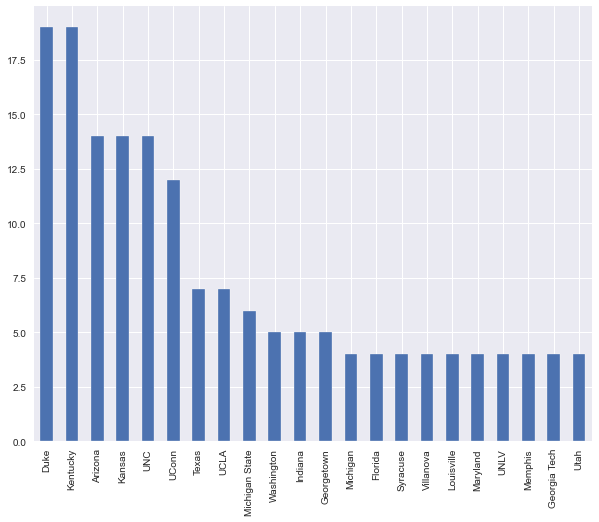

In [720]:
#  Which college produced the most lottery draft players
df['college'].value_counts().loc[lambda x : x>3].plot(kind='bar', figsize=(10,8))

In [721]:
#  Which college(s) produced the most number 1 picks
df[df['draft_pick'] == 1]['college'].value_counts()

Kentucky                     3
UNLV                         1
Duke                         1
Washington                   1
Utah                         1
Wake Forest                  1
Maryland                     1
Memphis                      1
Kansas                       1
Cincinnati                   1
Arizona                      1
Georgetown                   1
University of the Pacific    1
Name: college, dtype: int64

In [722]:
#  Confirm all the names are unique
df['name'].nunique() - df.shape[0]

0

### Feature Engineering (commonly uesd advanced stats)

In [723]:
#  Add Effect field goal percentage (eFG%)
df['NCAA_eFG'] = (df['NCAA_fg']+(0.5*df['NCAA_3p']))/df['NCAA_fga']

In [724]:
#  Add True Shooting percentage (TS%)
df['NCAA_tsp'] = df['NCAA_pts']/(2*(df['NCAA_fga'] + (0.44*df['NCAA_fta'])))

In [725]:
#  Add it to the test data
unseen_test['NCAA_eFG'] = (unseen_test['NCAA_fg']+(0.5*unseen_test['NCAA_3p']))/unseen_test['NCAA_fga']

In [726]:
unseen_test['NCAA_tsp'] = (unseen_test['NCAA_fg']+(0.5*unseen_test['NCAA_3p']))/unseen_test['NCAA_fga']

## Correlation, scatter plots to see relationships

In [727]:
df.corr()

,year,draft_pick,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb,NCAA_eFG,NCAA_tsp
year,1.000000,0.031293,-0.144901,-0.179393,0.121145,0.302557,0.308944,0.202741,0.013838,-0.084552,0.032958,-0.033930,-0.031946,-0.020949,-0.167021,-0.185682,-0.019234,0.006195,-0.074649,-0.198511,-0.029174,-0.059343,-0.128930,-0.054688,-0.304870,-0.309059,0.009250,0.146212,0.149777,0.082975,0.052955,-0.093302,-0.072445,-0.221925,-0.147672,-0.085443,-0.066074,-0.113327,0.087972,-0.290755,0.007932,-0.138470,-0.139716,-0.110877,-0.191914,-0.104438,0.022863,0.065209
draft_pick,0.031293,1.000000,-0.407189,-0.408293,-0.081278,-0.084330,-0.093950,-0.025814,-0.268224,-0.269097,-0.342493,-0.405029,-0.397727,-0.084594,-0.350313,-0.374104,0.002386,-0.116769,-0.416617,-0.224106,-0.398238,-0.277008,-0.397129,-0.318018,-0.142958,-0.093555,-0.179265,-0.000293,0.003950,0.031718,-0.080097,-0.204883,-0.276931,-0.153613,-0.074248,-0.155022,-0.149862,-0.194884,0.088494,0.229743,-0.172524,-0.160358,-0.150923,-0.159033,-0.119008,-0.242642,-0.186794,-0.165708
NBA_2p,-0.144901,-0.407189,1.000000,0.983705,0.283229,0.037598,0.042350,0.029507,0.387768,0.354006,0.615418,0.943166,0.886036,0.373143,0.798436,0.821777,0.173667,0.313301,0.829731,0.533932,0.901388,0.527059,0.727156,0.621948,0.299757,0.284553,0.048890,-0.132182,-0.122031,-0.066278,-0.014693,0.073044,0.175781,0.225217,0.147411,0.094977,0.137570,0.181790,-0.100576,-0.147142,0.060523,0.206965,0.168276,0.119923,0.028071,0.198109,-0.010263,-0.032841
NBA_2pa,-0.179393,-0.408293,0.983705,1.000000,0.128202,0.061675,0.069946,0.048627,0.424232,0.314092,0.572773,0.935844,0.911999,0.233484,0.806086,0.825808,0.188756,0.298112,0.840110,0.485294,0.900836,0.549980,0.757953,0.574481,0.289363,0.294201,-0.016843,-0.095808,-0.083088,-0.032167,0.022312,0.029472,0.151579,0.238070,0.184717,0.030456,0.151478,0.190497,-0.072480,-0.123442,0.080341,0.165672,0.190015,0.155158,0.059325,0.165704,-0.067414,-0.081132
NBA_2pp,0.121145,-0.081278,0.283229,0.128202,1.000000,-0.090306,-0.104493,-0.119806,-0.090017,0.312708,0.347326,0.235816,0.069223,0.898638,0.139843,0.166811,-0.032431,0.154203,0.167059,0.368948,0.198354,0.055598,0.021240,0.375793,0.047499,-0.073268,0.402648,-0.237090,-0.253852,-0.234949,-0.253493,0.265360,0.148794,-0.106838,-0.252241,0.385836,-0.112899,-0.070538,-0.197870,-0.138924,-0.190646,0.250353,-0.165251,-0.173916,-0.213597,0.197231,0.343516,0.271918
NBA_3p,0.302557,-0.084330,0.037598,0.061675,-0.090306,1.000000,0.988140,0.596252,0.462534,-0.297674,-0.092505,0.366860,0.460722,-0.321348,0.191854,0.123105,0.387445,0.273176,0.376981,-0.438200,0.440743,0.395872,0.349071,-0.231435,-0.452382,-0.377698,-0.287847,0.706865,0.705743,0.421513,0.401491,-0.435183,-0.366282,-0.009788,0.210094,-0.514253,-0.010051,-0.176511,0.482485,-0.061557,0.179865,-0.570043,0.147444,0.251603,0.121919,-0.468748,-0.099151,-0.011872
NBA_3pa,0.308944,-0.093950,0.042350,0.069946,-0.104493,0.988140,1.000000,0.584229,0.492679,-0.303611,-0.090801,0.367813,0.472827,-0.367376,0.201838,0.135819,0.374950,0.271755,0.386746,-0.442453,0.442689,0.425565,0.377587,-0.231932,-0.459378,-0.382145,-0.294553,0.705007,0.708769,0.434137,0.429315,-0.448731,-0.372673,-0.018531,0.208526,-0.530332,-0.009274,-0.173619,0.475480,-0.094381,0.181416,-0.578363,0.141200,0.279947,0.139294,-0.476125,-0.118887,-0.029573
NBA_3pp,0.202741,-0.025814,0.029507,0.048627,-0.119806,0.596252,0.584229,1.000000,0.321119,-0.330596,-0.126276,0.225910,0.282674,-0.279103,0.127075,0.059498,0.441675,0.170559,0.233144,-0.407070,0.271129,0.285850,0.173284,-0.241789,-0.340357,-0.248988,-0.311986,0.571969,0.575316,0.511039,0.314048,-0.487947,-0.336845,0.018701,0.222156,-0.501852,0.069029,-0.101409,0.532392,

### Shooting Correlations

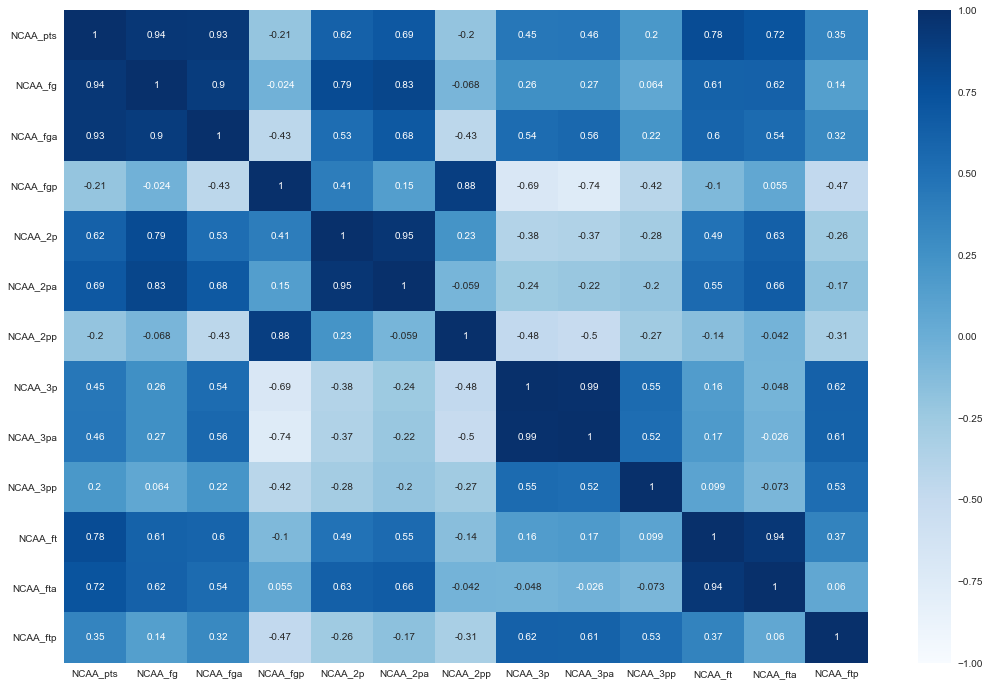

In [728]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df[['NCAA_pts', 'NCAA_fg', 'NCAA_fga', 'NCAA_fgp', 'NCAA_2p', 'NCAA_2pa', 'NCAA_2pp', 'NCAA_3p', 'NCAA_3pa', 'NCAA_3pp', 'NCAA_ft', 'NCAA_fta', 'NCAA_ftp']].corr(), 
            cmap="Blues", vmin=-1, annot=True)
plt.yticks(rotation=0) 
plt.show()

There is some interesting information here, very high correlation with fgp and 2-point percentage.  On first glance it was weird that 3 point percentage and field goal percentage is actually negative; it would seem counter-intutive, but the positions that normally score from under the basket and get high field goal percentage, don't normally do well from outside the arc.  Similarily with field goal percent and free throw percent.

One actual weird observation was that 3 point attemps and 3 points were not highly correlated like fga/fg and 2pa/2p.  Goes to players taking 3 pointers when they probably shouldn't be. 


## Ploting NBA vs NCAA stats

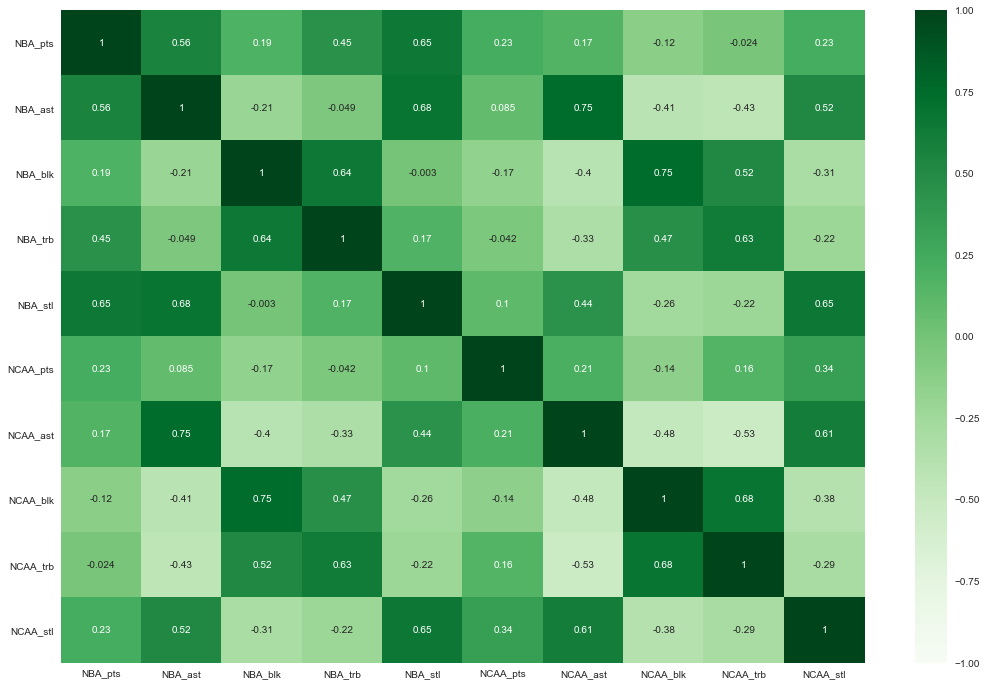

In [729]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.heatmap(df[['NBA_pts', 'NBA_ast', 'NBA_blk', 'NBA_trb', 'NBA_stl', 'NCAA_pts', 'NCAA_ast', 'NCAA_blk', 'NCAA_trb', 'NCAA_stl']].corr(), 
            cmap="Greens", vmin=-1, annot=True)
plt.yticks(rotation=0) 
plt.show()

Assists, Blocks, Total Rebounds and Steals seem to be positively correlated between NCAA and NBA.  Points doesn't seem to hold as well.  There also seems to be some correlation between similar skill sets, players that have high assists, also steal the ball and players that rebound and also good at blocking shots.  This matches with the roles of guard and forward well. 

## Check relationships with scatter plots

In [730]:
#  check the correlation between NCAA - NBA
nba_features = ['NBA_pts', 'NBA_ast', 'NBA_blk', 'NBA_trb', 'NBA_stl', 'NBA_fgp', 'NBA_2pp', 'NBA_3pp', 'NBA_ftp']
def scatter_plots_vs_nba_features(ncaa_feature):
    for feature in nba_features:
        plt.scatter(df[feature], df[ncaa_feature])
        plt.xlabel(feature)
        plt.ylabel(ncaa_feature)
        plt.show()

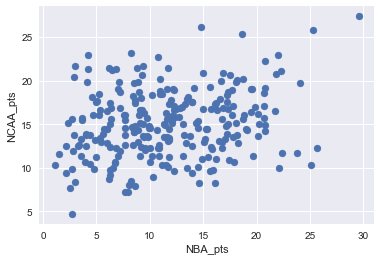

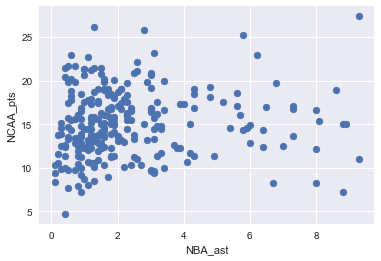

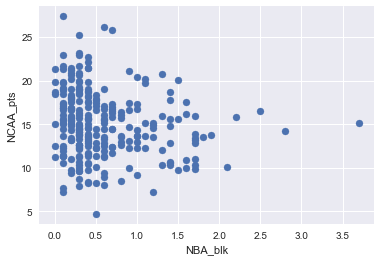

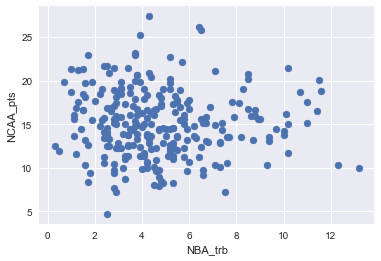

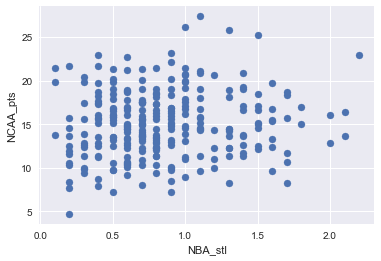

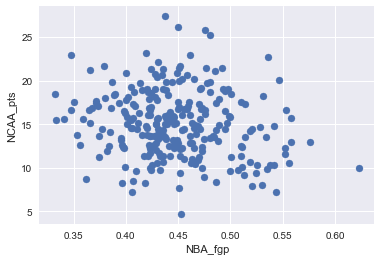

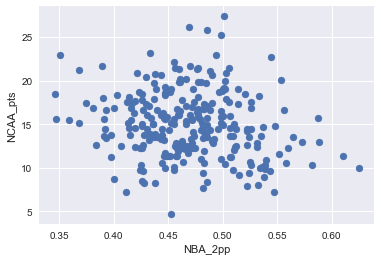

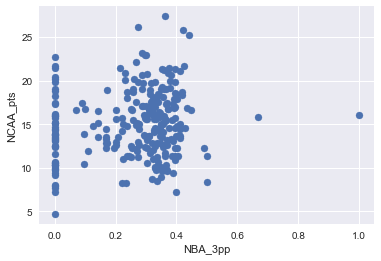

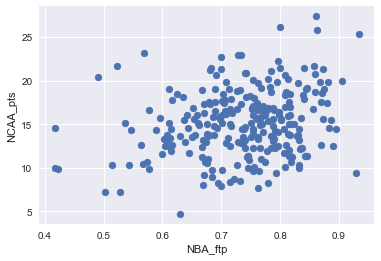

In [731]:
scatter_plots_vs_nba_features('NCAA_pts')

### Against NCAA_Pts
From the scatter plots we can see that there are couple of features that show some positive correlation such as points scored in the NBA and FT made. 

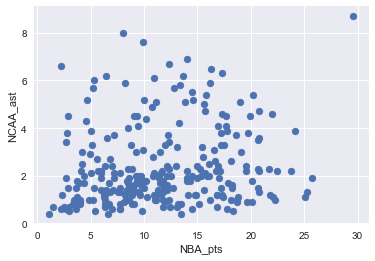

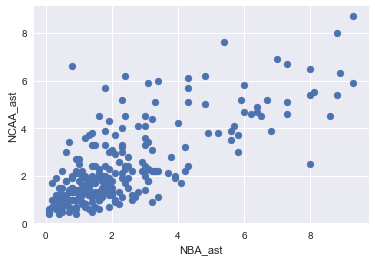

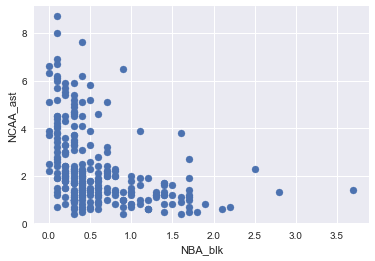

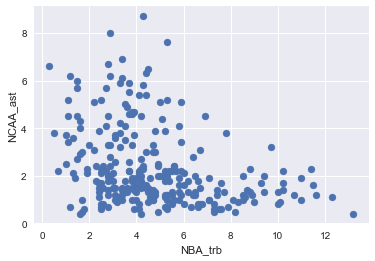

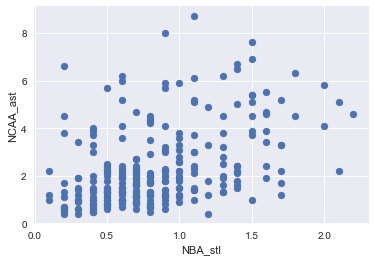

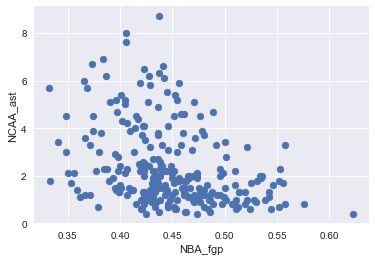

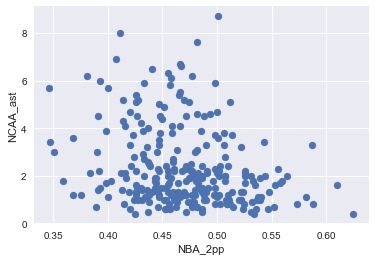

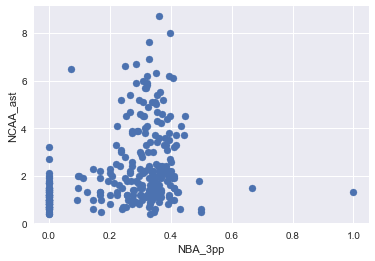

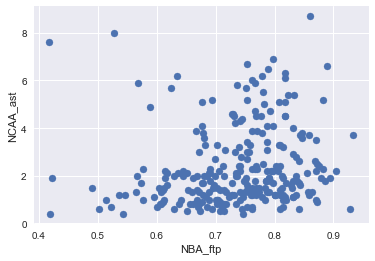

In [732]:
scatter_plots_vs_nba_features('NCAA_ast')

### Againt NCAA_ast
Similarly we can see NCAA ast numbers are positively correlated with NBA assets, and negatively correlated with rebounds and blocks.  This would make sense as normally high assists numbers are made by guards and high blk/rebound numbers are done by forwards.

## Categorial Features

In [733]:
df['position'].value_counts()

G      88
F      81
C      24
F-C    23
C-F    20
G-F    18
F-G    11
Name: position, dtype: int64

Notice some are labelled as F-G/G-F and C-F/F-C, will switch them to be the same

In [734]:
df.loc[df['position'] == 'F-G', 'position'] = 'G-F'

In [735]:
df.loc[df['position'] == 'C-F', 'position'] = 'F-C'

In [736]:
df.dtypes

name           object
year            int64
draft_pick      int64
position       object
college        object
NBA_2p        float64
NBA_2pa       float64
NBA_2pp       float64
NBA_3p        float64
NBA_3pa       float64
NBA_3pp       float64
NBA_ast       float64
NBA_blk       float64
NBA_drb       float64
NBA_fg        float64
NBA_fga       float64
NBA_fgp       float64
NBA_ft        float64
NBA_fta       float64
NBA_ftp       float64
NBA_g           int64
NBA_mp        float64
NBA_orb       float64
NBA_pts       float64
NBA_stl       float64
NBA_tov       float64
NBA_trb       float64
NCAA_2p       float64
NCAA_2pa      float64
NCAA_2pp      float64
NCAA_3p       float64
NCAA_3pa      float64
NCAA_3pp      float64
NCAA_ast      float64
NCAA_blk      float64
NCAA_drb      float64
NCAA_fg       float64
NCAA_fga      float64
NCAA_fgp      float64
NCAA_ft       float64
NCAA_fta      float64
NCAA_ftp      float64
NCAA_g        float64
NCAA_mp       float64
NCAA_orb      float64
NCAA_pts  

In [737]:
#  group by position
pts_mean = df[['NBA_pts','position']].groupby('position').describe()
pts_mean.head()

NBA_pts                                                       
           count       mean       std  min     25%    50%     75%   max
position                                                               
C           24.0   7.887500  5.208881  1.1   3.500   7.05  11.425  18.8
F           81.0  10.729630  5.064865  2.7   6.400  10.00  14.300  22.4
F-C         43.0  11.534884  5.426649  2.5   8.200  11.50  14.800  25.1
G           88.0  12.675000  5.817379  2.2   8.425  12.75  17.125  29.6
G-F         29.0  14.275862  5.352146  4.9  10.900  13.50  17.800  25.7

In [738]:
pts_mean = df[['NBA_ast','position']].groupby('position').describe()
pts_mean.head()

NBA_ast                                                 
           count      mean       std  min    25%  50%    75%  max
position                                                         
C           24.0  0.875000  0.768539  0.1  0.300  0.6  1.200  3.0
F           81.0  1.406173  0.891396  0.1  0.800  1.2  1.800  5.2
F-C         43.0  1.404651  0.673284  0.3  0.900  1.3  1.800  3.2
G           88.0  4.006818  2.467387  0.5  1.875  3.3  5.925  9.3
G-F         29.0  2.341379  0.985798  0.9  1.600  2.2  3.000  5.6

In [739]:
pts_mean = df[['NBA_blk','position']].groupby('position').describe()
pts_mean.head()

NBA_blk                                              
           count      mean       std  min  25%   50%  75%  max
position                                                      
C           24.0  0.995833  0.554412  0.1  0.4  1.05  1.5  1.8
F           81.0  0.580247  0.399193  0.0  0.3  0.40  0.7  1.7
F-C         43.0  1.158140  0.730698  0.1  0.6  1.00  1.4  3.7
G           88.0  0.244318  0.187456  0.0  0.1  0.20  0.3  1.1
G-F         29.0  0.465517  0.246802  0.1  0.3  0.40  0.7  1.1

In [740]:
pts_mean = df[['NBA_stl','position']].groupby('position').describe()
pts_mean.head()

NBA_stl                                                 
           count      mean       std  min    25%  50%    75%  max
position                                                         
C           24.0  0.450000  0.244949  0.1  0.300  0.4  0.525  1.2
F           81.0  0.740741  0.335700  0.1  0.500  0.7  0.900  1.7
F-C         43.0  0.697674  0.280720  0.2  0.500  0.7  0.800  1.5
G           88.0  1.040909  0.482483  0.1  0.675  1.0  1.400  2.2
G-F         29.0  1.051724  0.385098  0.5  0.800  1.0  1.300  2.1

In [741]:
pts_mean = df[['NBA_trb','position']].groupby('position').describe()
pts_mean.head()

NBA_trb                                                  
           count      mean       std  min    25%   50%   75%   max
position                                                          
C           24.0  6.029167  3.208071  1.2  3.775  5.95  8.30  13.2
F           81.0  5.111111  2.079603  1.1  3.800  5.20  6.00  11.6
F-C         43.0  6.997674  2.669982  2.5  4.750  7.30  9.15  12.3
G           88.0  3.160227  1.358967  0.3  2.200  3.25  4.10   6.9
G-F         29.0  4.037931  1.236474  1.6  3.100  3.80  4.90   6.5

In [742]:
#  create a line graph with positions vs years

In [743]:
pos_year = df.groupby('position')['year'].value_counts()

In [744]:
# Turn Position into dummies
df = pd.get_dummies(df, columns=['position'])

In [745]:
df.dtypes

name             object
year              int64
draft_pick        int64
college          object
NBA_2p          float64
NBA_2pa         float64
NBA_2pp         float64
NBA_3p          float64
NBA_3pa         float64
NBA_3pp         float64
NBA_ast         float64
NBA_blk         float64
NBA_drb         float64
NBA_fg          float64
NBA_fga         float64
NBA_fgp         float64
NBA_ft          float64
NBA_fta         float64
NBA_ftp         float64
NBA_g             int64
NBA_mp          float64
NBA_orb         float64
NBA_pts         float64
NBA_stl         float64
NBA_tov         float64
NBA_trb         float64
NCAA_2p         float64
NCAA_2pa        float64
NCAA_2pp        float64
NCAA_3p         float64
NCAA_3pa        float64
NCAA_3pp        float64
NCAA_ast        float64
NCAA_blk        float64
NCAA_drb        float64
NCAA_fg         float64
NCAA_fga        float64
NCAA_fgp        float64
NCAA_ft         float64
NCAA_fta        float64
NCAA_ftp        float64
NCAA_g          

In [746]:
#  Making draft_pick a category with order

df['draft_pick'] = pd.Categorical(df['draft_pick'], categories=[14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1], ordered=True)

## Outliers


<AxesSubplot:>

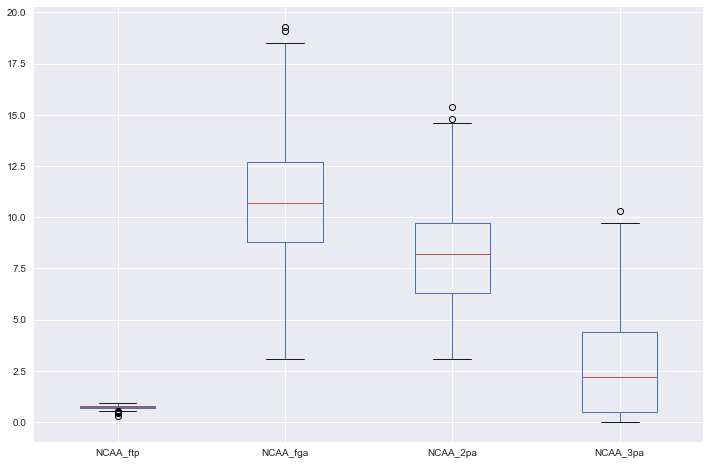

In [747]:
# Looking for outliers

df.boxplot(column=['NCAA_ftp', 'NCAA_fga', 'NCAA_2pa', 'NCAA_3pa'], figsize=(12, 8))

### Outliers in attempts
There are a couple outside the range, but doesn't look significant enough to remove.  We notice a with 3pa there is a right skewness as a lot of centers/forwards do not take 3p, while a few guards put up a number each game.  

<AxesSubplot:>

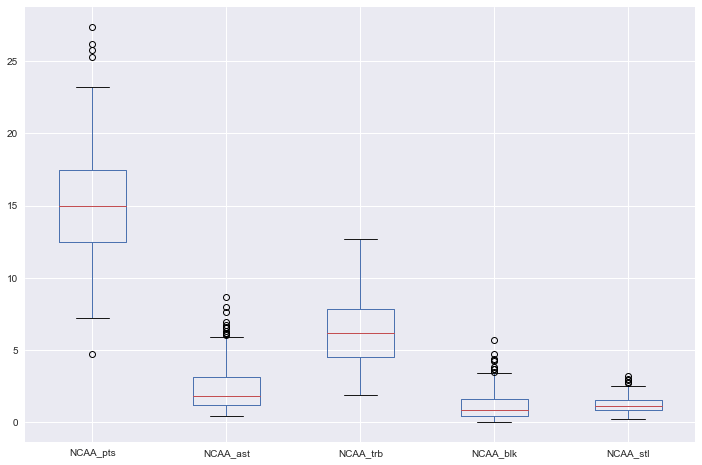

In [748]:
df.boxplot(column=['NCAA_pts', 'NCAA_ast', 'NCAA_trb', 'NCAA_blk', 'NCAA_stl'], figsize=(12, 8))

### Outliers in pts, ast, trb, blk and stl
Similarly we notice the majority of players do not get blocks/steals, but a few players excel at it. 

## Is our data normally distributed?

In [749]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'NBA_2p'}>,
        <AxesSubplot:title={'center':'NBA_2pa'}>,
        <AxesSubplot:title={'center':'NBA_2pp'}>,
        <AxesSubplot:title={'center':'NBA_3p'}>,
        <AxesSubplot:title={'center':'NBA_3pa'}>,
        <AxesSubplot:title={'center':'NBA_3pp'}>],
       [<AxesSubplot:title={'center':'NBA_ast'}>,
        <AxesSubplot:title={'center':'NBA_blk'}>,
        <AxesSubplot:title={'center':'NBA_drb'}>,
        <AxesSubplot:title={'center':'NBA_fg'}>,
        <AxesSubplot:title={'center':'NBA_fga'}>,
        <AxesSubplot:title={'center':'NBA_fgp'}>,
        <AxesSubplot:title={'center':'NBA_ft'}>],
       [<AxesSubplot:title={'center':'NBA_fta'}>,
        <AxesSubplot:title={'center':'NBA_ftp'}>,
        <AxesSubplot:title={'center':'NBA_g'}>,
        <AxesSubplot:title={'center':'NBA_mp'}>,
        <AxesSubplot:title={'center':'NBA_orb'}>,
        <AxesSubplot:title={'center':'NBA_pts'}>,
        

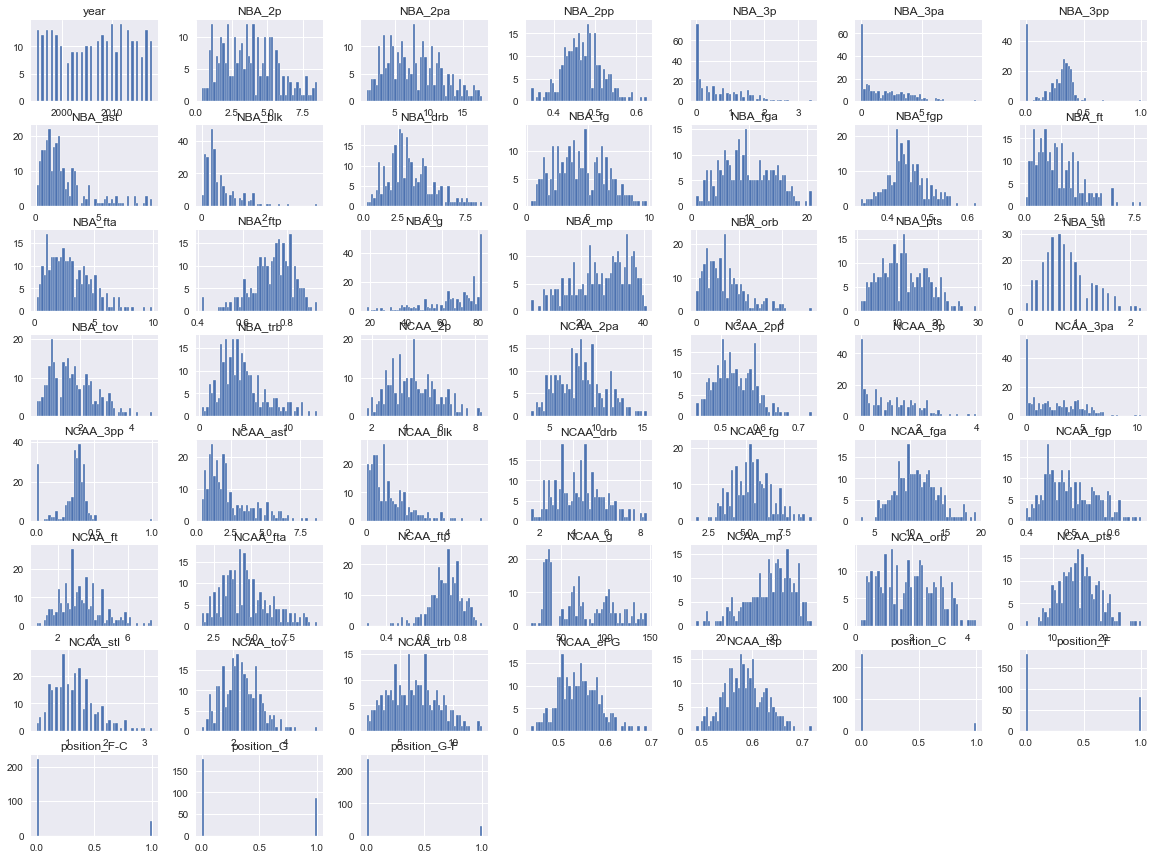

In [750]:
df[numeric_cols].hist(bins=50, figsize=(20,15))
    

There is quite a bit of skewness in the data, we should potentially log the numbers to create more of a normal distribution.

In [751]:
x_features = ['NCAA_2p',
 'NCAA_2pa',
 'NCAA_2pp',
 'NCAA_3p',
 'NCAA_3pa',
 'NCAA_3pp',
 'NCAA_ast',
 'NCAA_blk',
 'NCAA_drb',
 'NCAA_fg',
 'NCAA_fga',
 'NCAA_fgp',
 'NCAA_ft',
 'NCAA_fta',
 'NCAA_ftp',
 'NCAA_g',
 'NCAA_mp',
 'NCAA_orb',
 'NCAA_pts',
 'NCAA_stl',
 'NCAA_tov',
 'NCAA_trb',
 'NCAA_eFG',
 'NCAA_tsp',
 'position_C',
 'position_F',
 'position_F-C',
 'position_G',
 'position_G-F']

In [752]:
y_features = ['NBA_ast', 'NBA_pts', 'NBA_blk', 'NBA_stl', 'NBA_trb', 'NBA_2pp', 'NBA_3pp', 'NBA_ftp', 'NBA_fgp']

array([[<AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'NBA_2p'}>,
        <AxesSubplot:title={'center':'NBA_2pa'}>,
        <AxesSubplot:title={'center':'NBA_2pp'}>,
        <AxesSubplot:title={'center':'NBA_3p'}>,
        <AxesSubplot:title={'center':'NBA_3pa'}>,
        <AxesSubplot:title={'center':'NBA_3pp'}>],
       [<AxesSubplot:title={'center':'NBA_ast'}>,
        <AxesSubplot:title={'center':'NBA_blk'}>,
        <AxesSubplot:title={'center':'NBA_drb'}>,
        <AxesSubplot:title={'center':'NBA_fg'}>,
        <AxesSubplot:title={'center':'NBA_fga'}>,
        <AxesSubplot:title={'center':'NBA_fgp'}>,
        <AxesSubplot:title={'center':'NBA_ft'}>],
       [<AxesSubplot:title={'center':'NBA_fta'}>,
        <AxesSubplot:title={'center':'NBA_ftp'}>,
        <AxesSubplot:title={'center':'NBA_g'}>,
        <AxesSubplot:title={'center':'NBA_mp'}>,
        <AxesSubplot:title={'center':'NBA_orb'}>,
        <AxesSubplot:title={'center':'NBA_pts'}>,
        

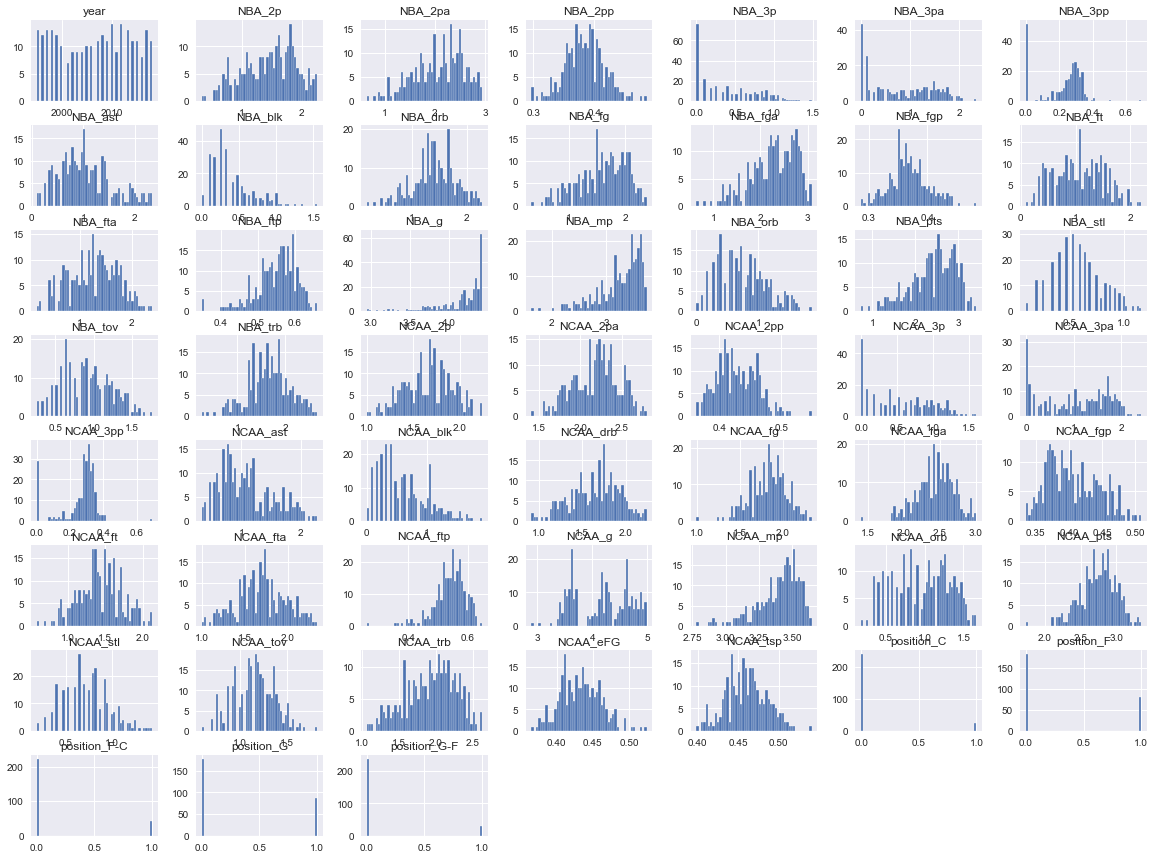

In [753]:

def scale_df(df, numeric_Cols):
    df_scaled=df.copy()
    #  Things I don't want scaled
    dont_scale = ['position_C',
     'position_F',
     'position_F-C',
     'position_G',
     'position_G-F', 'year']

    for feature in numeric_cols:
        if feature in dont_scale:
            df_scaled[feature] = df_scaled[feature]
        else:
            df_scaled[feature] = np.log1p(df_scaled[feature])

    return df_scaled

df_scaled = scale_df(df, numeric_cols)
df_scaled[numeric_cols].hist(bins=50, figsize=(20,15))


Tried using log1p to handle the log(0) cases as it threw errors for me.  I imagine logging the values is the way to go when I try model

In [754]:
df.describe()

,year,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb,NCAA_eFG,NCAA_tsp,position_C,position_F,position_F-C,position_G,position_G-F
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000
mean,2006.498113,3.741509,7.920755,0.469325,0.643774,1.861887,0.258434,2.323774,0.587547,3.389434,4.386792,9.788679,0.447030,2.218113,2.964151,0.736147,65.822642,26.506415,1.343019,11.636981,0.841132,1.688302,4.735094,4.424528,8.283774,0.535147,0.957358,2.597358,0.308792,2.337736,1.095472,4.420377,5.381887,10.877358,0.501313,3.367547,4.657736,0.720298,72.694340,29.407170,1.895472,15.084151,1.172453,2.283396,6.310189,0.542825,0.585586,0.090566,0.305660,0.162264,0.332075,0.109434
std,7.094131,1.926021,3.953669,0.047214,0.688301,1.845003,0.152600,2.001174,0.535868,1.657273,2.071820,4.479434,0.048579,1.435366,1.791974,0.092400,16.153696,8.782481,0.947544,5.627563,0.427651,0.852522,2.453896,1.359493,2.455436,0.049731,0.854640,2.186190,0.135852,1.641718,0.971165,1.474004,1.298766,2.907100,0.057475,1.250274,1.606269,0.088242,34.880111,4.480131,0.957851,3.810210,0.557962,0.710599,2.316216,0.042946,0.039680,0.287534,0.461558,0.369391,0.471849,0.312774
min,1995.000000,0.400000,0.900000,0.346000,0.000000,0.000000,0.000000,0.100000,0.000000,0.200000,0.400000,0.900000,0.332000,0.100000,0.200000,0.417000,18.000000,4.100000,0.000000,1.100000,0.100000,0.300000,0.300000,1.700000,3.100000,0.437000,0.000000,0.000000,0.000000,0.400000,0.000000,1.500000,1.700000,3.100000,0.398000,0.800000,1.700000,0.295000,17.000000,15.100000,0.200000,4.700000,0.200000,0.800000,1.900000,0.441176,0.489339,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2000.000000,2.100000,4.600000,0.438000,0.000000,0.100000,0.171000,1.000000,0.200000,2.300000,2.800000,6.200000,0.420000,1.100000,1.600000,0.681000,57.000000,19.800000,0.600000,7.200000,0.500000,1.000000,2.900000,3.300000,6.300000,0.498000,0.200000,0.500000,0.290000,1.200000,0.400000,3.300000,4.500000,8.800000,0.454000,2.500000,3.500000,0.679000,37.000000,26.700000,1.100000,12.500000,0.800000,1.800000,4.500000,0.509804,0.557832,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,3.500000,7.700000,0.468000,0.400000,1.300000,0.309000,1.700000,0.400000,3.100000,4.300000,9.400000,0.442000,1.900000,2.600000,0.750000,71.000000,28.200000,1.100000,11.300000,0.800000,1.500000,4.300000,4.300000,8.200000,0.530000,0.800000,2.200000,0.345000,1.800000,0.800000,4.400000,5.300000,10.700000,0.492000,3.200000,4.500000,0.729000,69.000000,30.200000,1.900000,15.000000,1.100000,2.200000,6.200000,0.540816,0.584572,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2013.000000,5.100000,10.600000,0.500000,1.100000,3.200000,0.360000,3.000000,0.800000,4.300000,6.000000,13.500000,0.473000,3.100000,4.100000,0.801000,79.000000,34.000000,1.800000,15.900000,1.100000,2.200000,5.900000,5.300000,9.700000,0.573000,1.600000,4.400000,0.387000,3.100000,1.600000,5.400000,6.200000,12.700000,0.547000,4.000000,5.700000,0.779000,102.000000,32.800000,2.600000,17.500000,1.500000,2.800000,7.800000,0.572368,0.612126,0.000000,1.000000,0.000000,1.000000,0.000000
max,2018.000000,8.500000,17.800000,0.625000,3.400000,9.500000,1.000000,9.300000,3.700000,8.700000

In [755]:
df_y_features = df[y_features]

## Over the years

In [756]:
from datetime import timedelta
import statsmodels.api as sm
import seaborn as sns; sns.set_theme(color_codes=True)

def year_vs_features(df, feature, feature_nba):
    data = df.copy()
    data = data[['year', feature, feature_nba]]
    data = data.groupby('year').mean()

    fig, ax = plt.subplots(figsize=(15,10))
    title = feature.split('_', 1)[-1]
    ax.set_title(title + " over the years")
    ax.set_xlabel('Year')
    ax.set_ylabel(title)
    sns.regplot(data = data.reset_index(), x = 'year', y = feature, label=feature)
    sns.regplot(data = data.reset_index(), x = 'year', y = feature_nba, label=feature_nba)
    ax.set_xlabel('Year')
    ax.set_ylabel(title)    
    plt.legend(loc=4)


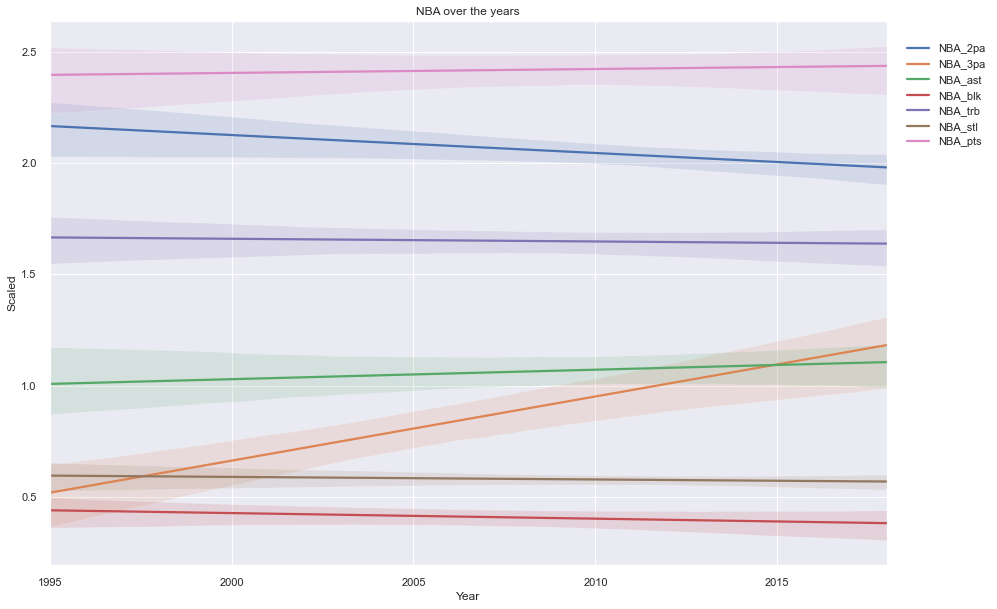

In [757]:
def nba_over_the_years(df):
    data = df.copy()
    data = data[['year', 'NBA_2pa', 'NBA_3pa', 'NBA_blk', 'NBA_ast', 'NBA_pts', 'NBA_trb', 'NBA_stl']]
    data = data.groupby('year').mean()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("NBA over the years")
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_2pa', label='NBA_2pa', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_3pa', label='NBA_3pa', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_ast', label='NBA_ast', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_blk', label='NBA_blk', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_trb', label='NBA_trb', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_stl', label='NBA_stl', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NBA_pts', label='NBA_pts', scatter=False)
    ax.set_xlabel('Year')
    ax.set_ylabel("Scaled")    
    plt.legend(loc=4, bbox_to_anchor=(1.13, 0.75))
    
nba_over_the_years(df_scaled)

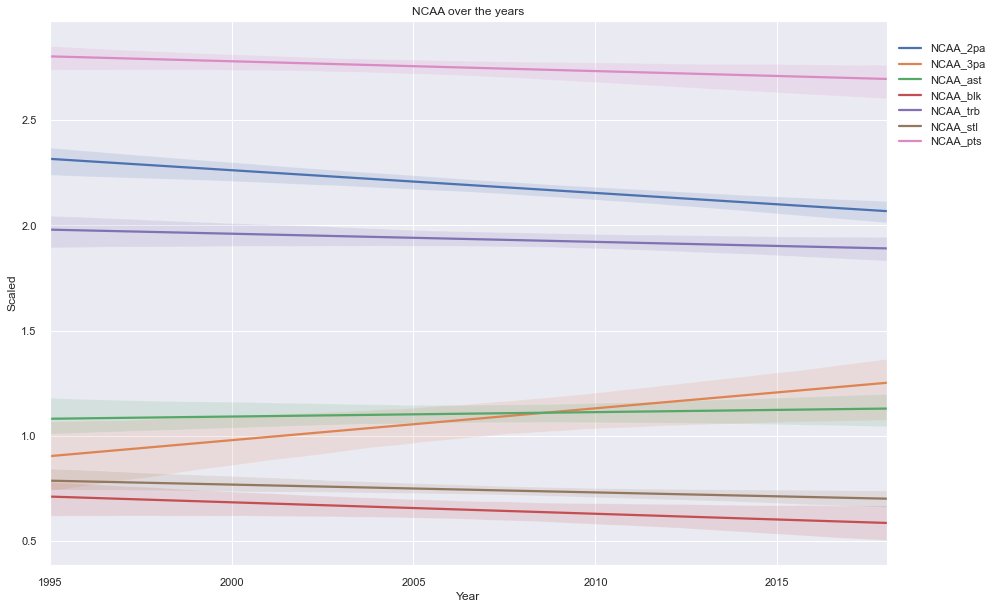

In [758]:
def ncaa_over_the_years(df):
    data = df.copy()
    data = data[['year', 'NCAA_2pa', 'NCAA_3pa', 'NCAA_blk', 'NCAA_ast', 'NCAA_pts', 'NCAA_trb', 'NCAA_stl']]
    data = data.groupby('year').mean()
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("NCAA over the years")
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_2pa', label='NCAA_2pa', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_3pa', label='NCAA_3pa', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_ast', label='NCAA_ast', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_blk', label='NCAA_blk', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_trb', label='NCAA_trb', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_stl', label='NCAA_stl', scatter=False)
    sns.regplot(data = data.reset_index(), x = 'year', y = 'NCAA_pts', label='NCAA_pts', scatter=False)
    ax.set_xlabel('Year')
    ax.set_ylabel("Scaled")    
    plt.legend(loc=4, bbox_to_anchor=(1.13, 0.75))
    
ncaa_over_the_years(df_scaled)

## Correlation

In [759]:
def corr_heatmap(X, target):
    data = pd.concat([X, target], axis=1)
    corrmap = data.corr()
    plt.figure(figsize=(20,20))
    sns.heatmap(corrmap, annot=True, cmap="Greens", vmin=-1)


In [760]:
# Return all the correlated pairs
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                colname2 = corr_matrix.columns[j]
                col_corr.add((colname, colname2))
    return col_corr

In [761]:
correlation(df[x_features], 0.8)

{('NCAA_2pa', 'NCAA_2p'),
 ('NCAA_3pa', 'NCAA_3p'),
 ('NCAA_eFG', 'NCAA_2pp'),
 ('NCAA_eFG', 'NCAA_fgp'),
 ('NCAA_fg', 'NCAA_2pa'),
 ('NCAA_fga', 'NCAA_fg'),
 ('NCAA_fgp', 'NCAA_2pp'),
 ('NCAA_fta', 'NCAA_ft'),
 ('NCAA_orb', 'NCAA_drb'),
 ('NCAA_pts', 'NCAA_fg'),
 ('NCAA_pts', 'NCAA_fga'),
 ('NCAA_trb', 'NCAA_drb'),
 ('NCAA_trb', 'NCAA_orb'),
 ('NCAA_tsp', 'NCAA_eFG')}

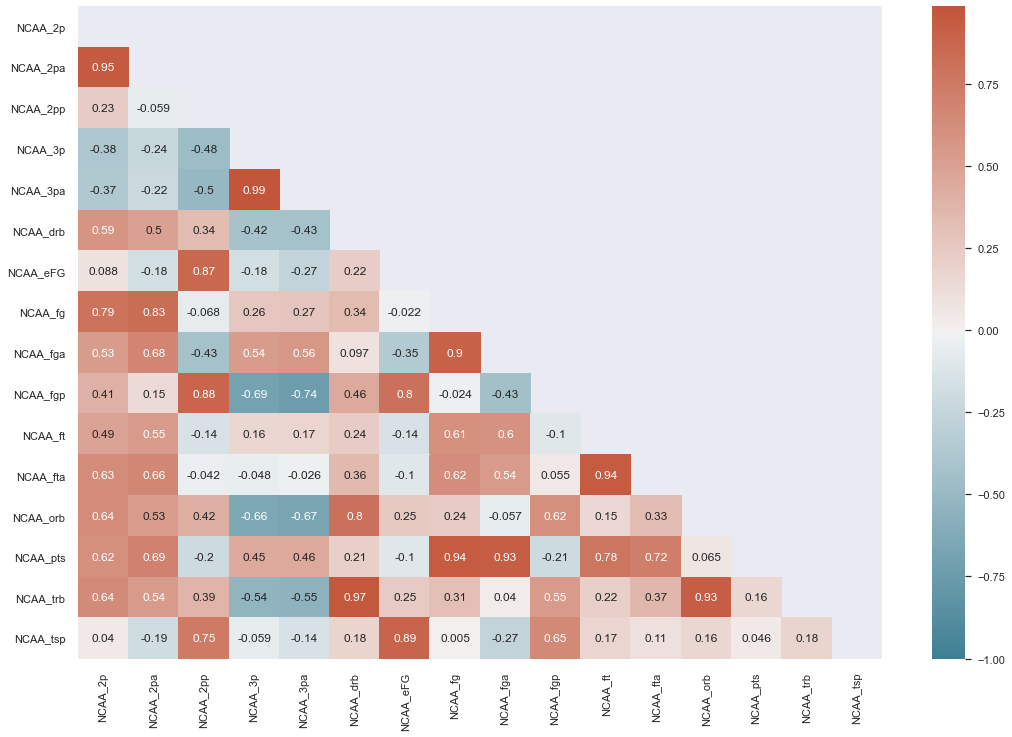

In [762]:
correlated = df[['NCAA_2p',
 'NCAA_2pa',
 'NCAA_2pp',
 'NCAA_3p',
 'NCAA_3pa',
 'NCAA_drb',
 'NCAA_eFG',
 'NCAA_fg',
 'NCAA_fga',
 'NCAA_fgp',
 'NCAA_ft',
 'NCAA_fta',
 'NCAA_orb',
 'NCAA_pts',
 'NCAA_trb',
 'NCAA_tsp'
]].corr()
fig, ax = plt.subplots(figsize=(18, 12))
mask = np.triu(correlated)
# color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlated, 
             vmin=-1, annot=True, mask=mask, cmap=cmap)
plt.yticks(rotation=0) 
plt.show()

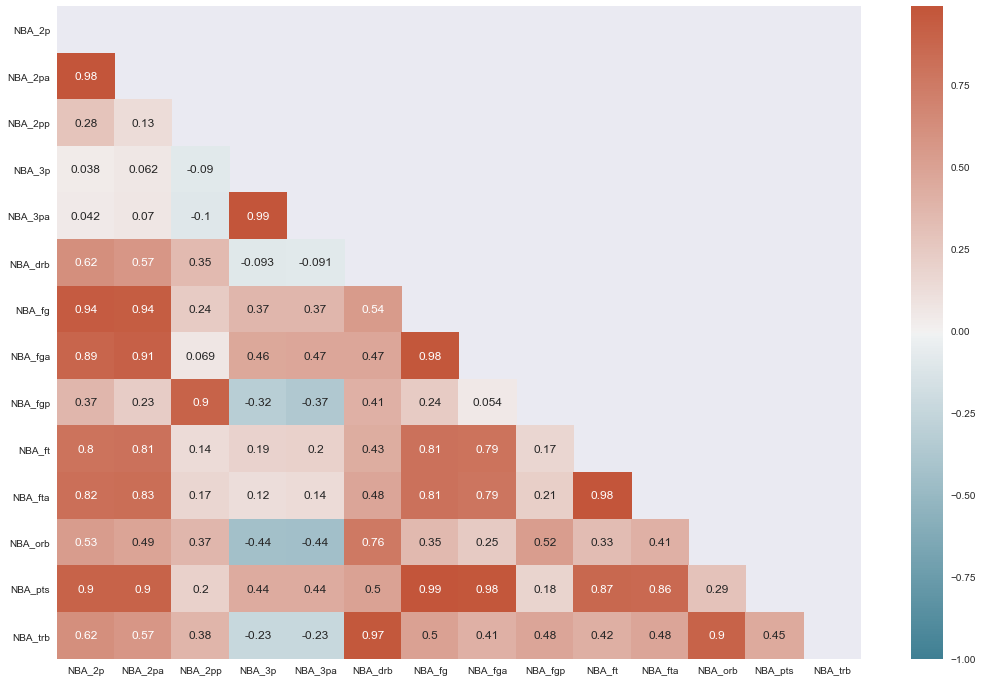

In [986]:
correlated_nba = df[['NBA_2p',
 'NBA_2pa',
 'NBA_2pp',
 'NBA_3p',
 'NBA_3pa',
 'NBA_drb',
 'NBA_fg',
 'NBA_fga',
 'NBA_fgp',
 'NBA_ft',
 'NBA_fta',
 'NBA_orb',
 'NBA_pts',
 'NBA_trb',
]].corr()
fig, ax = plt.subplots(figsize=(18, 12))
mask = np.triu(correlated_nba)
# color map
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlated_nba, 
             vmin=-1, annot=True, mask=mask, cmap=cmap)
plt.yticks(rotation=0) 
plt.show()

In [763]:
non_corr_x_features = [
 'NCAA_2p',
 'NCAA_2pp',
 'NCAA_3p',
 'NCAA_3pp',
 'NCAA_ast',
 'NCAA_blk',
 'NCAA_ft',
 'NCAA_ftp',
 'NCAA_g',
 'NCAA_mp',
 'NCAA_pts',
 'NCAA_stl',
 'NCAA_tov',
 'NCAA_trb',
 'position_C',
 'position_F',
 'position_F-C',
 'position_G',
 'position_G-F']

## Feature important

In [764]:
###### Corr ###

In [765]:
def corr_vs_target(X, y):
    ast_df = pd.concat([X, y], axis=1).corr()
    return pd.Series(ast_df[y.name],name='corr').abs().sort_values(ascending=False)

In [766]:
# ################### Kbest Feature Selection ###################

In [767]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

def kbest_features_select(X, y):
    ordered_features=SelectKBest(score_func=f_regression,k='all').fit(X,y)

    df_scores = pd.Series(ordered_features.scores_, name='KBest Score', index=X.columns)
    return df_scores

In [768]:
################### Information gain ######

In [769]:
from sklearn.feature_selection import mutual_info_regression

def info_gain(X, y):
    mutual_info=mutual_info_regression(X,y)
    mutual_data=pd.Series(mutual_info,index=X.columns, name='info_gain')
    return mutual_data.sort_values(ascending=False)
    

In [770]:
#  Not using XGBoost anymore

# from sklearn.datasets import make_regression
# from xgboost import XGBRegressor
# #  try xg boost, may not use
# def xgboost_feature(X, y):
   


#     model = XGBRegressor()
#     model.fit(X, y)

#     importance = model.feature_importances_
#     feature_df = {
#         'feature': [],
#         'xgboost': []
#     }

#     for i,v in enumerate(importance):
#         feature_df['feature'].append(X.columns[i])
#         feature_df['xgboost'].append(v)

#     return pd.Series(feature_df['xgboost'], index=feature_df['feature'], name='xgboost')

In [771]:
def summarise_feature_importance(df, x_features, target):
    data = df.copy()
#     xg = xgboost_feature(data[x_features], data[target])
    infoGain = info_gain(data[x_features], data[target])
    kbest = kbest_features_select(data[x_features], data[target])
    corr = corr_vs_target(data[x_features], data[target])
#     Remove the last corr row which is correlated with itself
    return pd.concat([corr, kbest, infoGain], axis=1).iloc[1:, :]

In [772]:
#      sort by first column, then highlight top 5
def highlight_top5(s):
    is_large = s.nlargest(5).values
    return ['background-color: yellow' if v in is_large else '' for v in s]

# Models

In [773]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
import math

def linear_reg(X, y, title):
#     split data
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)
    
    
#     Fit model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
#     Cross validation

    cross_val_scores = cross_validate(model, X, y, cv = 5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    
    cross_val_scores_mse = np.absolute(cross_val_scores['test_neg_mean_squared_error'].mean())
    cross_val_scores_r2 = cross_val_scores['train_r2'].mean()
    cross_val_scores_rmse = np.sqrt(np.absolute(cross_val_scores['test_neg_mean_squared_error']).mean())
    adj_r2 = (1 - (1 - cross_val_scores_r2) * ((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
    print('Cross_val_scores_mse', cross_val_scores_mse)

    print('Cross_val_scores_r2', cross_val_scores_r2)
    print('Cross_val_scores_rmse', cross_val_scores_rmse)
    print('adjusted r2 ', adj_r2)
 
    
#      Train test split
    print('R2: ', model.score(X_test, y_test))
    
    mse = mean_squared_error(y_test, y_pred)

    print('Mean squared error (MSE): %.2f'
          % mse)
    
    rmse = np.sqrt(mse)
  
    print('Root Mean Squared Error: ' + str(rmse))
    
    r2 = r2_score(y_test, y_pred)
    print('Coefficient of determination (R^2): %.2f'
          % r2)
    
    adj_r2 = (1 - (1 - cross_val_scores_r2) * ((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
    
    print('Adjusted (R^2): %.2f'
          % adj_r2)

    

#   Plot model
    fig, ax = plt.subplots(figsize=(15,10))
    ax.set_title("Predicting 2nd year NBA " + title)
    ax.set_xlabel('y_test')
    ax.set_ylabel("y_pred")
    plt.style.use('seaborn')
    m, b = np.polyfit(y_test, y_pred, 1)
    plt.plot(y_test, m*y_test + b, c='red')
    plt.scatter(y_test, y_pred, cmap='Spectral', edgecolor='k')
    plt.show()
    
    return model


In [774]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm
import math

def linear_reg_optimise(X, y, title, features):
#     split data


    columns = X.columns;
    goal = []
    currentFeatures = []
    for row in features.itertuples():
        print(row.Index)
        currentFeatures.append(row.Index)
        X_train, X_test, y_train, y_test = train_test_split(X[currentFeatures], y, test_size = 0.2, random_state=23)


    #     Fit model
        model = LinearRegression()
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

    #     Cross validation

        cross_val_scores = cross_validate(model, X[currentFeatures], y, cv = 5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
        
        cross_val_scores_mse = np.absolute(cross_val_scores['test_neg_mean_squared_error'].mean())
        cross_val_scores_r2 = cross_val_scores['train_r2'].mean()
        cross_val_scores_rmse = np.sqrt(np.absolute(cross_val_scores['test_neg_mean_squared_error']).mean())
        adj_r2 = (1 - (1 - cross_val_scores_r2) * ((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
        print('Cross_val_scores_mse', cross_val_scores_mse)

        print('Cross_val_scores_r2', cross_val_scores_r2)
        print('Cross_val_scores_rmse', cross_val_scores_rmse)
        print('adjusted r2 ', adj_r2)
    
    
    




In [775]:
from sklearn.ensemble import RandomForestRegressor

def random_forest(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=23)

    model = RandomForestRegressor(n_estimators = 1000, random_state = 23)
    
    model.fit(X_train, y_train);
    
    y_pred = model.predict(X_test)
    
#     Train test split
    
    print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
    
    
    mse = mean_squared_error(y_test, y_pred)
    
    print('Mean squared error (MSE): %.2f'
          % mse)
    
    rmse = np.sqrt(mse)
  
    print('Root Mean Squared Error: ' + str(rmse))    

    
    print(model.feature_importances_)
    
#   Plot feature importance
    plt.figure(figsize=(10,6))
    sorted_idx = model.feature_importances_.argsort()
    plt.barh(X.columns[sorted_idx], model.feature_importances_[sorted_idx])
    plt.title("Random Forest Feature Importance")
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()
    
    return model

In [776]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

def knn_model(X, y, k):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(scaled_features, y,
                                                    test_size=0.2, random_state=23)

    
    model = KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
#   Train test split

    print('Coefficient of determination (R^2): %.2f'
      % r2_score(y_test, y_pred))
    
    
    mse = mean_squared_error(y_test, y_pred)
 
    print('Mean squared error (MSE): %.2f'
          % mse)
    
    rmse = np.sqrt(mse)
  
    print('Root Mean Squared Error: ' + str(rmse))
    
    
    
    #     Cross validation

    cross_val_scores = cross_validate(model, scaled_features, y, cv = 5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    
    cross_val_scores_mse = np.absolute(cross_val_scores['test_neg_mean_squared_error'].mean())
    cross_val_scores_r2 = cross_val_scores['train_r2'].mean()
    cross_val_scores_rmse = np.sqrt(np.absolute(cross_val_scores['test_neg_mean_squared_error']).mean())
    adj_r2 = (1 - (1 - cross_val_scores_r2) * ((len(X_train)-1)/(len(X_train)-X_train.shape[1]-1)))
    
    print('Cross_val_scores_mse', cross_val_scores_mse)
    print('Cross_val_scores_r2', cross_val_scores_r2)
    print('Cross_val_scores_rmse', cross_val_scores_rmse)
    print('adjusted r2 ', adj_r2)
    

    
    
    error_rate = []

    for i in range(1,50):
        
        knn_model = KNeighborsRegressor(n_neighbors = i)
        knn_model.fit(X_train, y_train)  
        
        # make prediction on test set
        pred = knn_model.predict(X_test) 
        
        error = np.sqrt(mean_squared_error(y_test, pred)) #calculate rmse
        
        error_rate.append(error) #store rmse values
        
#     Plot error rate
    plt.figure(figsize=(10,6))
    plt.plot(range(1,50),error_rate,color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    
    return model

In [777]:
#  Decided not to use Xgboost

# from xgboost import XGBRegressor
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedKFold

# def xg(X, y) :

    
#     model = XGBRegressor()

# #    train test split
    
#     X_train, X_test, y_train, y_test = train_test_split(X, y,
#                                                     test_size=0.20, random_state=23)

#     model.fit(X_train,y_train)
    
#     y_pred = model.predict(X_test)
    
    
#     print('Coefficient of determination (R^2): %.2f'
#       % r2_score(y_test, y_pred))
    
    
#     mse = mean_squared_error(y_test, y_pred)

#     rmse = np.sqrt(mse)
    
#     print('Mean squared error (MSE): %.2f'
#           % mse)
  
#     print('Root Mean Squared Error: ' + str(rmse))
    
    
#     #     Cross validation

#     cross_val_scores = cross_validate(model, X, y, cv = 5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
    
#     print('Cross_val_scores_mse', np.absolute(cross_val_scores['test_neg_mean_squared_error'].mean()))
#     print('Cross_val_scores_r2',cross_val_scores['train_r2'])
#     print('Cross_val_scores_r2',cross_val_scores['train_r2'].mean())
#     print('Cross_val_scores_rmse', np.sqrt(np.absolute(cross_val_scores['test_neg_mean_squared_error']).mean()))
    
# #      Plot

#     x_ax = range(len(y_test))
#     plt.plot(x_ax, y_test, label="original")
#     plt.plot(x_ax, y_pred, label="predicted")
#     plt.legend()
#     plt.show()

#     return model
    

## Scale Test set

In [778]:
unseen_test.head()

,name,year,draft_pick,college,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb,position_F,position_F-C,position_G,position_G-F,position_C,NCAA_eFG,NCAA_tsp
321,Zion Williamson,2019,1,Duke,10.2,16.4,0.622,0.2,0.6,0.294,3.7,0.6,4.5,10.4,17.0,0.611,6.0,8.7,0.698,61,33.2,2.7,27.0,0.9,2.7,7.2,8.2,11.0,0.747,0.7,2.2,0.338,2.1,1.8,5.4,9.0,13.2,0.680,3.9,6.2,0.640,33.0,30.0,3.5,22.6,2.1,2.4,8.9,0,1,0,0,0,0.708333,0.708333
322,Ja Morant,2019,2,Murray State,5.8,11.6,0.501,1.1,3.7,0.304,7.3,0.2,3.0,6.9,15.3,0.453,4.4,6.0,0.738,58,32.3,0.9,19.4,0.9,3.2,3.9,4.8,8.9,0.545,1.3,3.8,0.343,8.2,0.6,4.6,6.1,12.6,0.485,5.1,6.3,0.810,65.0,35.3,1.5,18.7,1.4,3.8,6.1,0,0,1,0,0,0.535714,0.535714
323,RJ Barrett,2019,3,Duke,4.9,10.5,0.466,1.6,4.1,0.396,3.0,0.3,4.7,6.5,14.6,0.447,2.9,3.9,0.743,66,34.6,1.0,17.6,0.7,2.0,5.7,6.5,12.2,0.529,1.9,6.2,0.308,4.3,0.4,6.0,8.4,18.5,0.454,3.9,5.9,0.665,38.0,35.3,1.6,22.6,0.9,3.2,7.6,0,0,0,1,0,0.505405,0.505405
324,De'Andre Hunter,2019,4,Virginia,4.1,6.8,0.596,1.6,4.4,0.356,2.1,0.5,4.3,5.6,11.2,0.502,3.3,3.8,0.867,20,31.3,0.8,16.0,0.9,1.4,5.1,3.4,6.3,0.541,0.9,2.3,0.419,1.6,0.5,3.1,4.4,8.5,0.509,2.8,3.6,0.773,71.0,26.6,1.3,12.4,0.6,1.2,4.4,1,0,0,0,0,0.570588,0.570588
326,Jarrett Culver,2019,6,Texas Tech,1.6,3.4,0.487,0.4,1.6,0.245,0.7,0.3,2.1,2.0,4.9,0.411,0.9,1.4,0.604,34,14.7,1.0,5.3,0.5,0.8,3.1,3.9,7.5,0.522,1.4,4.1,0.341,2.8,0.6,4.4,5.3,11.6,0.459,2.9,4.2,0.687,75.0,29.5,1.2,14.9,1.3,2.1,5.6,0,0,1,0,0,0.517241,0.517241


In [779]:
scaled_unseen_test = scale_df(unseen_test, numeric_cols)

In [780]:
scaled_unseen_test.head()

,name,year,draft_pick,college,NBA_2p,NBA_2pa,NBA_2pp,NBA_3p,NBA_3pa,NBA_3pp,NBA_ast,NBA_blk,NBA_drb,NBA_fg,NBA_fga,NBA_fgp,NBA_ft,NBA_fta,NBA_ftp,NBA_g,NBA_mp,NBA_orb,NBA_pts,NBA_stl,NBA_tov,NBA_trb,NCAA_2p,NCAA_2pa,NCAA_2pp,NCAA_3p,NCAA_3pa,NCAA_3pp,NCAA_ast,NCAA_blk,NCAA_drb,NCAA_fg,NCAA_fga,NCAA_fgp,NCAA_ft,NCAA_fta,NCAA_ftp,NCAA_g,NCAA_mp,NCAA_orb,NCAA_pts,NCAA_stl,NCAA_tov,NCAA_trb,position_F,position_F-C,position_G,position_G-F,position_C,NCAA_eFG,NCAA_tsp
321,Zion Williamson,2019,1,Duke,2.415914,2.856470,0.483660,0.182322,0.470004,0.257738,1.547563,0.470004,1.704748,2.433613,2.890372,0.476855,1.945910,2.272126,0.529451,4.127134,3.532226,1.308333,3.332205,0.641854,1.308333,2.104134,2.219203,2.484907,0.557900,0.530628,1.163151,0.291176,1.131402,1.029619,1.856298,2.302585,2.653242,0.518794,1.589235,1.974081,0.494696,3.526361,3.433987,1.504077,3.161247,1.131402,1.223775,2.292535,0,1,0,0,0,0.535518,0.535518
322,Ja Morant,2019,2,Murray State,1.916923,2.533697,0.406132,0.741937,1.547563,0.265436,2.116256,0.182322,1.386294,2.066863,2.791165,0.373630,1.686399,1.945910,0.552735,4.077537,3.505557,0.641854,3.015535,0.641854,1.435085,1.589235,1.757858,2.292535,0.435024,0.832909,1.568616,0.294906,2.219203,0.470004,1.722767,1.960095,2.610070,0.395415,1.808289,1.987874,0.593327,4.189655,3.591818,0.916291,2.980619,0.875469,1.568616,1.960095,0,0,1,0,0,0.428996,0.428996
323,RJ Barrett,2019,3,Duke,1.774952,2.442347,0.382538,0.955511,1.629241,0.333611,1.386294,0.262364,1.740466,2.014903,2.747271,0.369492,1.360977,1.589235,0.555608,4.204693,3.572346,0.693147,2.923162,0.530628,1.098612,1.902108,2.014903,2.580217,0.424614,1.064711,1.974081,0.268499,1.667707,0.336472,1.945910,2.240710,2.970414,0.374318,1.589235,1.931521,0.509825,3.663562,3.591818,0.955511,3.161247,0.641854,1.435085,2.151762,0,0,0,1,0,0.409062,0.409062
324,De'Andre Hunter,2019,4,Virginia,1.629241,2.054124,0.467500,0.955511,1.686399,0.304539,1.131402,0.405465,1.667707,1.887070,2.501436,0.406798,1.458615,1.568616,0.624333,3.044522,3.475067,0.587787,2.833213,0.641854,0.875469,1.808289,1.481605,1.987874,0.432432,0.641854,1.193922,0.349952,0.955511,0.405465,1.410987,1.686399,2.251292,0.411447,1.335001,1.526056,0.572673,4.276666,3.317816,0.832909,2.595255,0.470004,0.788457,1.686399,1,0,0,0,0,0.451450,0.451450
326,Jarrett Culver,2019,6,Texas Tech,0.955511,1.481605,0.396761,0.336472,0.955511,0.219136,0.530628,0.262364,1.131402,1.098612,1.774952,0.344299,0.641854,0.875469,0.472501,3.555348,2.753661,0.693147,1.840550,0.405465,0.587787,1.410987,1.589235,2.140066,0.420025,0.875469,1.629241,0.293416,1.335001,0.470004,1.686399,1.840550,2.533697,0.377751,1.360977,1.648659,0.522952,4.330733,3.417727,0.788457,2.766319,0.832909,1.131402,1.887070,0,0,1,0,0,0.416894,0.416894


## Points

In [942]:
feature_importance_nba_blk = summarise_feature_importance(df, x_features, 'NBA_pts')

In [943]:
feature_importance_nba_blk.style.apply(highlight_top5)

,corr,KBest Score,info_gain
NCAA_pts,0.233244,15.131141,0.068791
NCAA_stl,0.233162,15.119864,0.054886
NCAA_fga,0.225860,14.137557,0.089655
position_C,0.210654,12.212541,0.023464
NCAA_fg,0.197890,10.718944,0.000000
NCAA_3pa,0.191257,9.985566,0.044916
NCAA_3p,0.181897,8.999506,0.007430
NCAA_ft,0.178814,8.687071,0.000000
NCAA_ast,0.167351,7.577932,0.021607
NCAA_g,0.164848,7.346613,0.089740


Not much correlated to Points, going to make it harder to get a good model

In [783]:
linear_reg_optimise(df_scaled[x_features], df['NBA_pts'], 'Points', feature_importance_nba_blk)

NCAA_pts
Cross_val_scores_mse 30.286801286570324
Cross_val_scores_r2 0.052679986726733
Cross_val_scores_rmse 5.5033445545931725
adjusted r2  0.048168939044479386
NCAA_stl
Cross_val_scores_mse 30.036137009697722
Cross_val_scores_r2 0.08033380614979405
Cross_val_scores_rmse 5.480523424792355
adjusted r2  0.07153317271582071
NCAA_fga
Cross_val_scores_mse 30.192371421012467
Cross_val_scores_r2 0.08097210901749233
Cross_val_scores_rmse 5.494758540737934
adjusted r2  0.06771689905139844
position_C
Cross_val_scores_mse 29.669903495372722
Cross_val_scores_r2 0.10056202551954878
Cross_val_scores_rmse 5.447008674068063
adjusted r2  0.08318158156823563
NCAA_fg
Cross_val_scores_mse 30.33666583688268
Cross_val_scores_r2 0.10278298523107503
Cross_val_scores_rmse 5.507873077412249
adjusted r2  0.0810058732221205
NCAA_3pa
Cross_val_scores_mse 30.29492500870336
Cross_val_scores_r2 0.10400146467617552
Cross_val_scores_rmse 5.504082576479332
adjusted r2  0.07777711730084402
NCAA_3p
Cross_val_scores_mse 3

Cross_val_scores_mse 30.06052020911327
Cross_val_scores_r2 0.1345485778567536
Cross_val_scores_rmse 5.482747505504268
adjusted r2  0.09149129317300997
R2:  -0.1480911186992755
Mean squared error (MSE): 33.95
Root Mean Squared Error: 5.826461402467365
Coefficient of determination (R^2): -0.15
Adjusted (R^2): 0.09


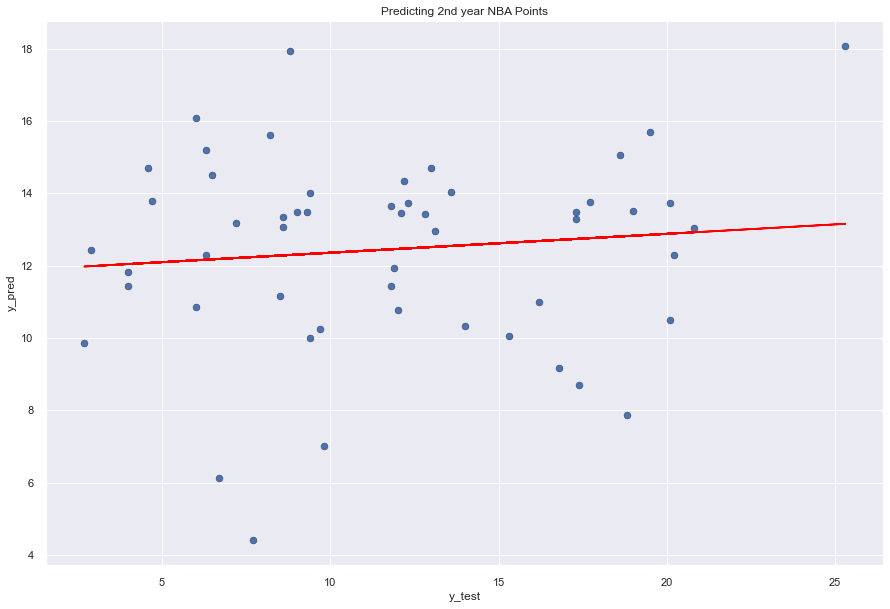

In [784]:
points = ['NCAA_pts', 'NCAA_stl', 'NCAA_ft', 'NCAA_3p','NCAA_blk', 'position_C', 'position_G', 'position_F', 'position_G-F', 'position_F-C']
model_linear = linear_reg(df_scaled[points], df['NBA_pts'], 'Points')

Coefficient of determination (R^2): 0.04
Mean squared error (MSE): 28.27
Root Mean Squared Error: 5.3168106689652515
[0.05316982 0.05979945 0.04034161 0.05139071 0.09867472 0.06068569
 0.06643479 0.06632065 0.07338389 0.07269024 0.08202347 0.07240207
 0.06552244 0.07696799 0.02251391 0.01342765 0.00419463 0.00346156
 0.01659471]


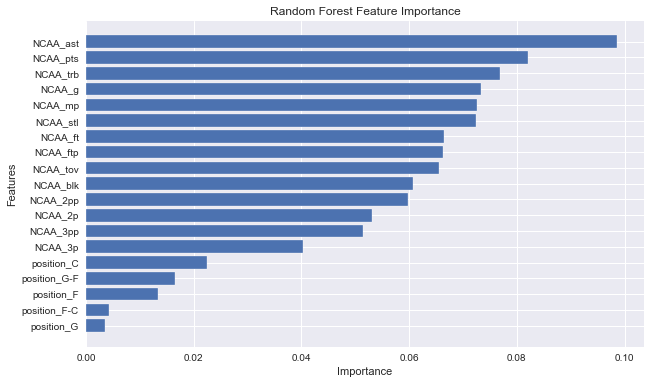

RandomForestRegressor(n_estimators=1000, random_state=23)

In [785]:
#  try with non corr features
random_forest(df[non_corr_x_features], df['NBA_pts'])

Coefficient of determination (R^2): 0.07
Mean squared error (MSE): 27.60
Root Mean Squared Error: 5.253193313379577
[0.02382403 0.03263317 0.0314283  0.01703641 0.02920778 0.03337917
 0.07664448 0.04111952 0.03809494 0.03933659 0.05105748 0.02191187
 0.03600267 0.03616723 0.04638107 0.05369109 0.05361798 0.04119985
 0.04168527 0.05643703 0.05244388 0.03368626 0.02966772 0.03589079
 0.01893964 0.01115148 0.00275977 0.00243581 0.01216872]


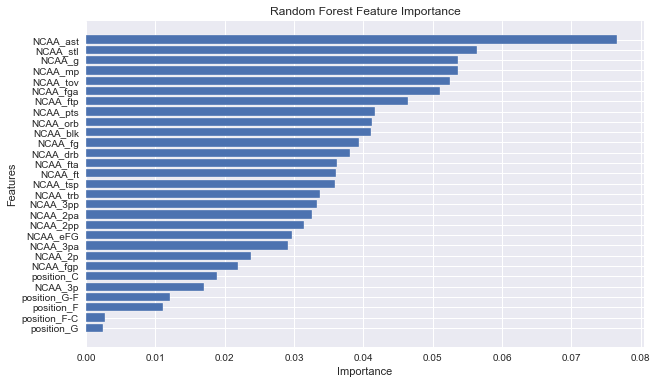

RandomForestRegressor(n_estimators=1000, random_state=23)

In [786]:
# With all features?
random_forest(df[x_features], df['NBA_pts'])

Coefficient of determination (R^2): 0.02
Mean squared error (MSE): 29.07
Root Mean Squared Error: 5.392123138464852
Cross_val_scores_mse 30.11617915676684
Cross_val_scores_r2 0.07966856242435102
Cross_val_scores_rmse 5.487820984395067
adjusted r2  -0.011405902752405828


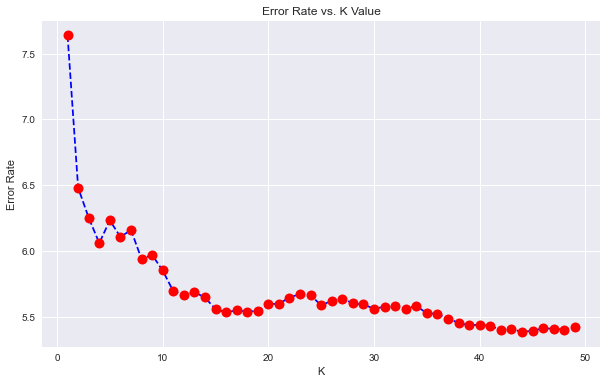

KNeighborsRegressor(n_neighbors=45)

In [787]:
knn_model(df[non_corr_x_features], df['NBA_pts'], 45)

Cross_val_scores_mse 29.253267337773195
Cross_val_scores_r2 0.22465595960794071
Cross_val_scores_rmse 5.408628970244973
adjusted r2  0.1479292056108099
R2:  -0.13842421506863833
Mean squared error (MSE): 33.66
Root Mean Squared Error: 5.801880207148327
Coefficient of determination (R^2): -0.14
Adjusted (R^2): 0.15


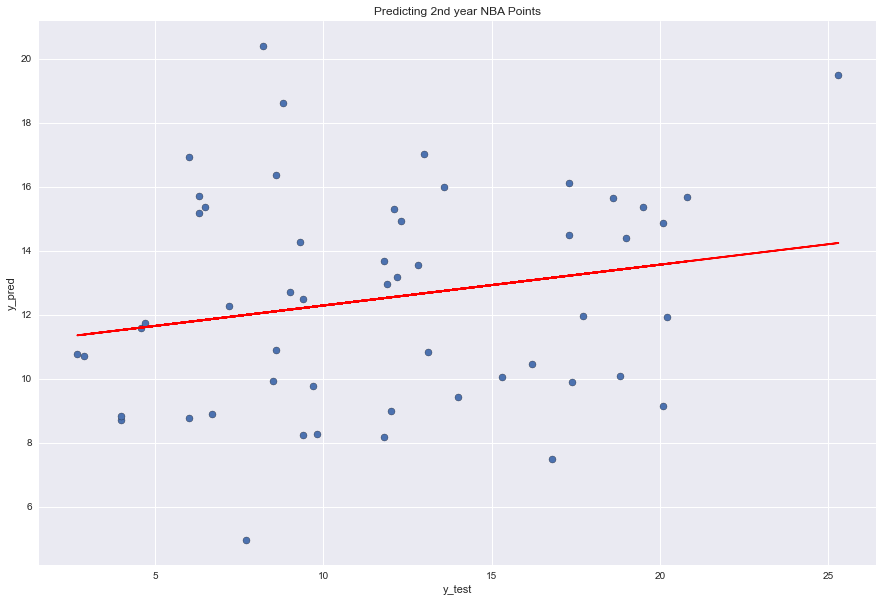

LinearRegression()

In [788]:
linear_reg(df_scaled[non_corr_x_features], df['NBA_pts'], 'Points')

Cross_val_scores_mse 29.33889116882802
Cross_val_scores_r2 0.21798007261742686
Cross_val_scores_rmse 5.416538670482102
adjusted r2  0.1405926839701931
R2:  -0.10509769117546708
Mean squared error (MSE): 32.68
Root Mean Squared Error: 5.716326558268645
Coefficient of determination (R^2): -0.11
Adjusted (R^2): 0.14


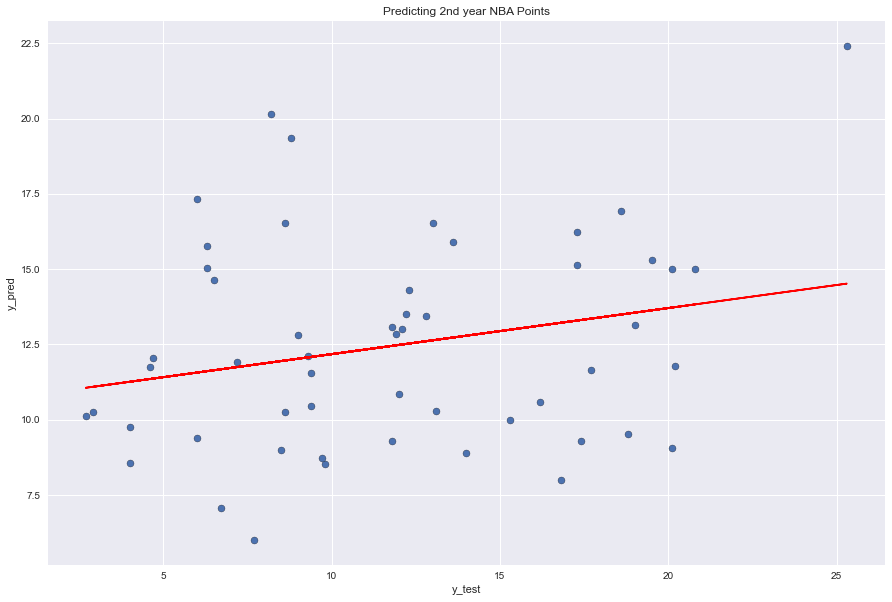

LinearRegression()

In [789]:
linear_reg(df[non_corr_x_features], df['NBA_pts'], 'Points')

Cross_val_scores_mse 29.970191108073816
Cross_val_scores_r2 0.2605580185457535
Cross_val_scores_rmse 5.474503731670462
adjusted r2  0.14273484567667016
R2:  -0.041117476696929334
Mean squared error (MSE): 30.78
Root Mean Squared Error: 5.548384675136079
Coefficient of determination (R^2): -0.04
Adjusted (R^2): 0.14


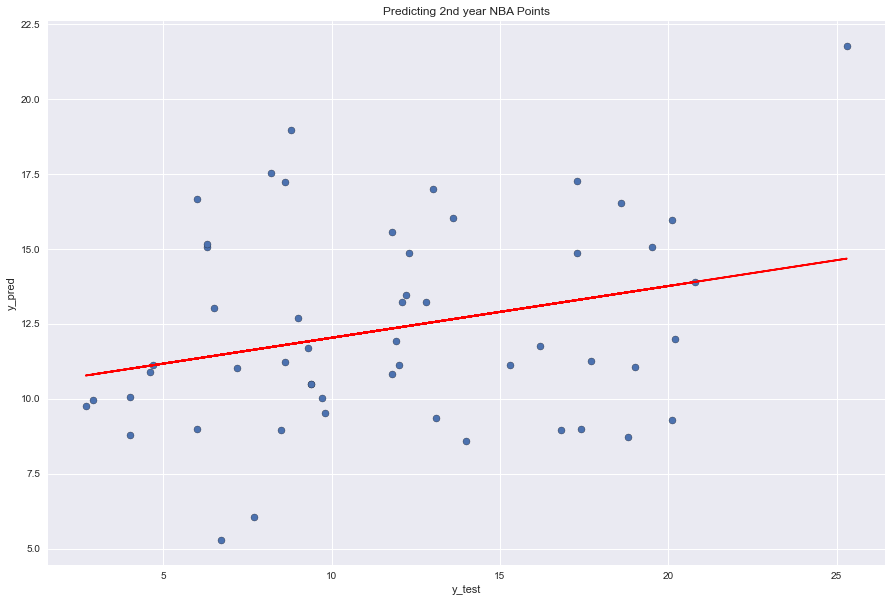

In [790]:
#  Best model, using this to predict
lr_model_pts = linear_reg(df[x_features], df['NBA_pts'], 'Points')

## Predicting unseen data for points

In [791]:
lr_model_pts.predict(unseen_test[x_features])

array([23.22569889, 21.59626377, 20.16128585, 12.44857646, 15.63627541,
       16.926674  ,  4.81408245, 11.52189375, 12.81303625, 13.04274147,
       14.83485609])

In [793]:
#  Using all features unscaled data

pred_pts = lr_model_pts.predict(unseen_test[x_features])

In [794]:
r2_score(unseen_test['NBA_pts'], pred_pts)

0.5399759301641139

In [795]:
unseen_test = unseen_test.reset_index()

In [796]:
series_pts = pd.Series(pred_pts).round(2)

In [797]:
points_df = pd.concat([unseen_test[['name', 'draft_pick', 'NBA_g', 'NBA_pts']], series_pts], axis=1 , ignore_index=True, keys=["name", "NBA_pts", "pred_pts"])

In [798]:
points_df = points_df.rename(columns={0: "name", 1: "draft_pick", 2: 'NBA_g', 3:"NBA_pts", 4:"pred_pts"})

In [799]:
points_df

,name,draft_pick,NBA_g,NBA_pts,pred_pts
0,Zion Williamson,1,61,27.0,23.23
1,Ja Morant,2,58,19.4,21.60
2,RJ Barrett,3,66,17.6,20.16
3,De'Andre Hunter,4,20,16.0,12.45
4,Jarrett Culver,6,34,5.3,15.64
5,Coby White,7,63,14.9,16.93
6,Jaxson Hayes,8,54,6.6,4.81
7,Rui Hachimura,9,52,13.8,11.52
8,Cam Reddish,10,26,11.2,12.81
9,Cameron Johnson,11,60,9.6,13.04


## Assists

In [936]:
feature_importance_nba_ast = summarise_feature_importance(df, x_features, 'NBA_ast')

In [937]:
feature_importance_nba_ast.style.apply(highlight_top5)

,corr,KBest Score,info_gain
NCAA_ast,0.748698,335.472735,0.420863
position_G,0.594137,143.490551,0.194268
NCAA_stl,0.518438,96.671879,0.155438
NCAA_orb,0.500732,88.009329,0.176389
NCAA_trb,0.431497,60.171087,0.151214
NCAA_blk,0.408500,52.677811,0.113386
NCAA_tov,0.390352,47.278655,0.081941
NCAA_3pa,0.390132,47.215700,0.111442
NCAA_fgp,0.380995,44.659036,0.117616
NCAA_3p,0.373185,42.553576,0.075085


Cross_val_scores_mse 1.792244072010614
Cross_val_scores_r2 0.5823226382130977
Cross_val_scores_rmse 1.3387472024286788
adjusted r2  0.5637132508067506
R2:  0.49413017791540725
Mean squared error (MSE): 2.73
Root Mean Squared Error: 1.6511690413718032
Coefficient of determination (R^2): 0.49
Adjusted (R^2): 0.56


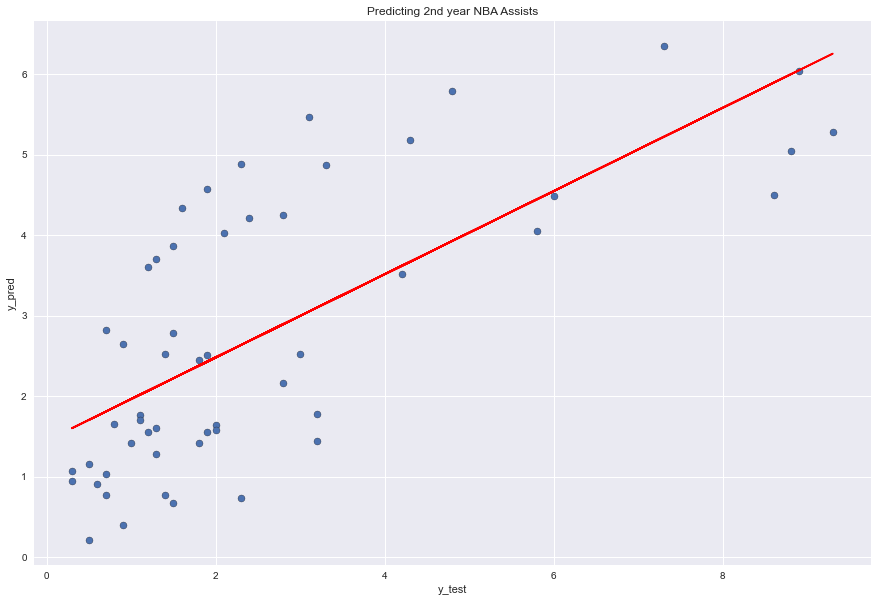

LinearRegression()

In [802]:
assists = ['NCAA_ast', 'NCAA_stl', 'NCAA_blk', 'NCAA_trb', 'position_C', 'position_G', 'position_F', 'position_G-F', 'position_F-C']
linear_reg(df[assists], df['NBA_ast'], 'Assists')

Coefficient of determination (R^2): 0.39
Mean squared error (MSE): 3.26
Root Mean Squared Error: 1.8064596120589036
[0.0102888  0.01105334 0.02637314 0.01404861 0.03271221 0.01365725
 0.59625175 0.0112717  0.02906562 0.01074139 0.0153664  0.01391593
 0.00861836 0.00739364 0.02523568 0.01640126 0.0280155  0.01164338
 0.01230129 0.02453637 0.01935096 0.0203451  0.00915149 0.01290099
 0.00425286 0.00149229 0.00101103 0.01108205 0.00152161]


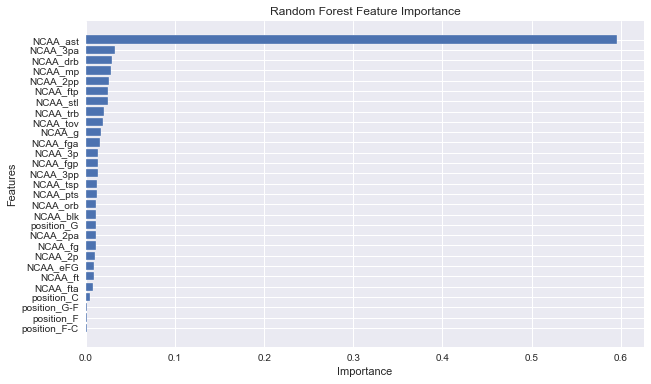

RandomForestRegressor(n_estimators=1000, random_state=23)

In [803]:
random_forest(df[x_features], df['NBA_ast'])

Coefficient of determination (R^2): 0.43
Mean squared error (MSE): 3.08
Root Mean Squared Error: 1.7541134743149966
Cross_val_scores_mse 2.0689415250272885
Cross_val_scores_r2 0.5509611472131052
Cross_val_scores_rmse 1.4383815644769953
adjusted r2  0.479411000340468


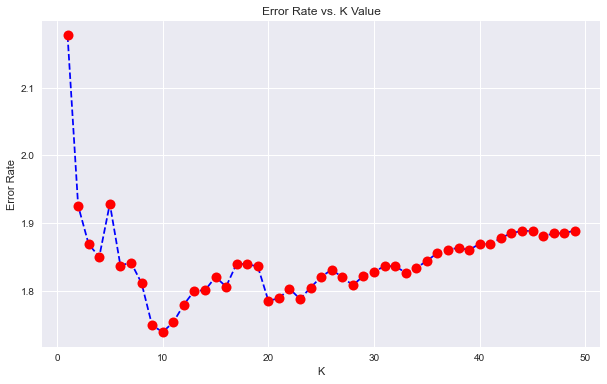

KNeighborsRegressor(n_neighbors=11)

In [804]:
knn_model(df[x_features], df['NBA_ast'], 11) 
# 11

Cross_val_scores_mse 1.7923370266725187
Cross_val_scores_r2 0.6179022449232131
Cross_val_scores_rmse 1.338781919011651
adjusted r2  0.5800904879104061
R2:  0.47742400803870755
Mean squared error (MSE): 2.82
Root Mean Squared Error: 1.6782122155414159
Coefficient of determination (R^2): 0.48
Adjusted (R^2): 0.58


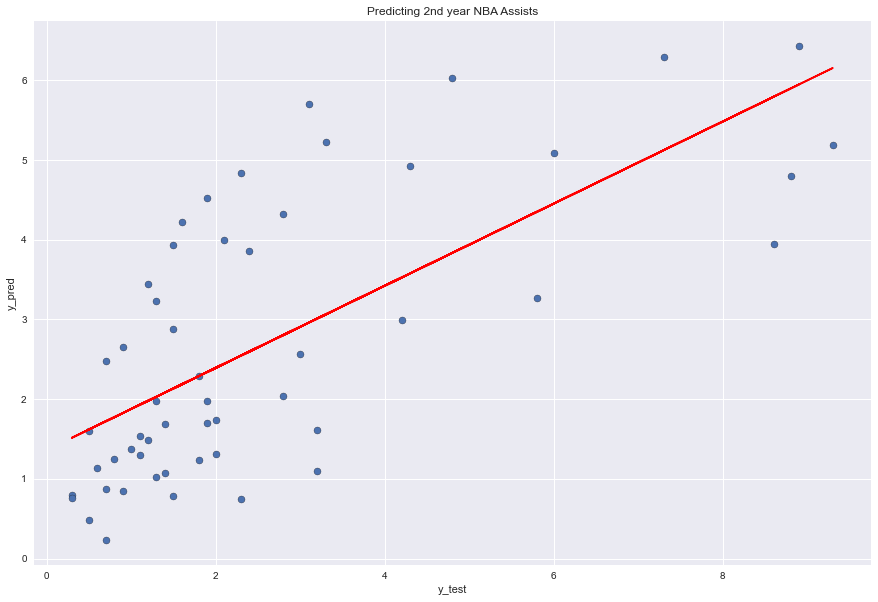

LinearRegression()

In [810]:
linear_reg(df[non_corr_x_features], df['NBA_ast'], 'Assists')

Cross_val_scores_mse 1.9072030302255478
Cross_val_scores_r2 0.5926723263668394
Cross_val_scores_rmse 1.3810152172317103
adjusted r2  0.552363858663558
R2:  0.4372594544096311
Mean squared error (MSE): 3.03
Root Mean Squared Error: 1.7415111316730385
Coefficient of determination (R^2): 0.44
Adjusted (R^2): 0.55


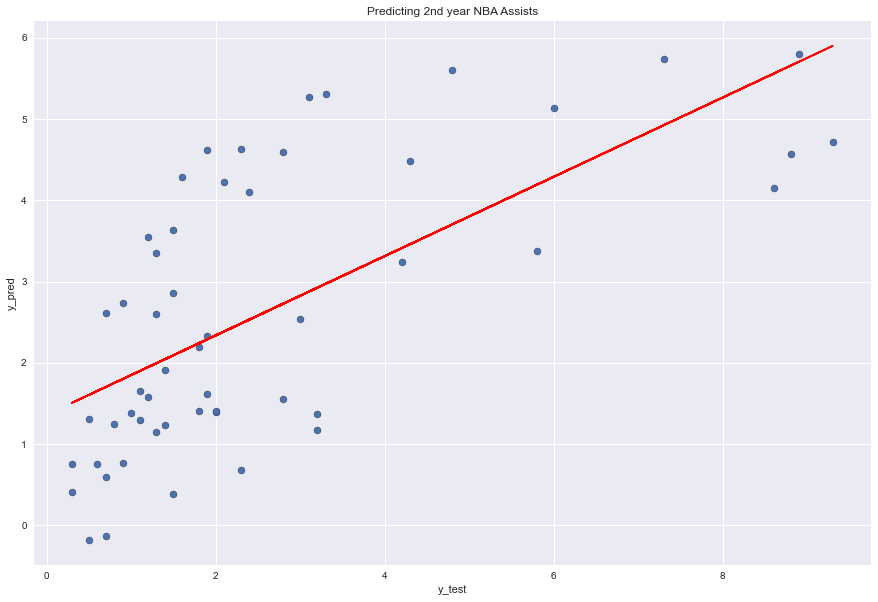

LinearRegression()

In [807]:
linear_reg(df_scaled[non_corr_x_features], df['NBA_ast'], 'Assists')

Cross_val_scores_mse 1.930826069736408
Cross_val_scores_r2 0.6315315542678361
Cross_val_scores_rmse 1.3895416761423198
adjusted r2  0.5728195491786452
R2:  0.45436277043837603
Mean squared error (MSE): 2.94
Root Mean Squared Error: 1.7148421460642393
Coefficient of determination (R^2): 0.45
Adjusted (R^2): 0.57


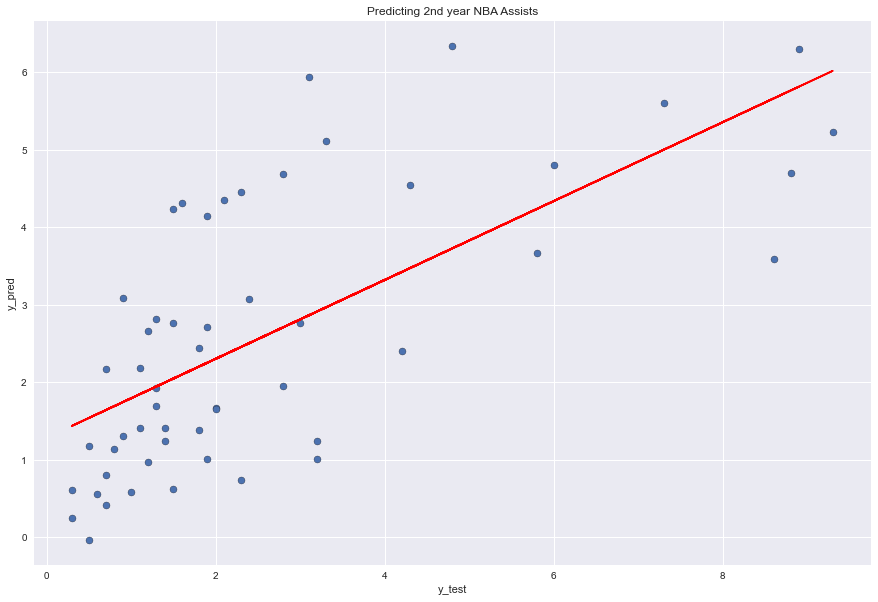

LinearRegression()

In [808]:
linear_reg(df_scaled[x_features], df['NBA_ast'], 'Assists')

Cross_val_scores_mse 1.8679922000668099
Cross_val_scores_r2 0.6345244155786066
Cross_val_scores_rmse 1.3667451115942613
adjusted r2  0.576289294983989
R2:  0.4872768892912904
Mean squared error (MSE): 2.76
Root Mean Squared Error: 1.6623160491432227
Coefficient of determination (R^2): 0.49
Adjusted (R^2): 0.58


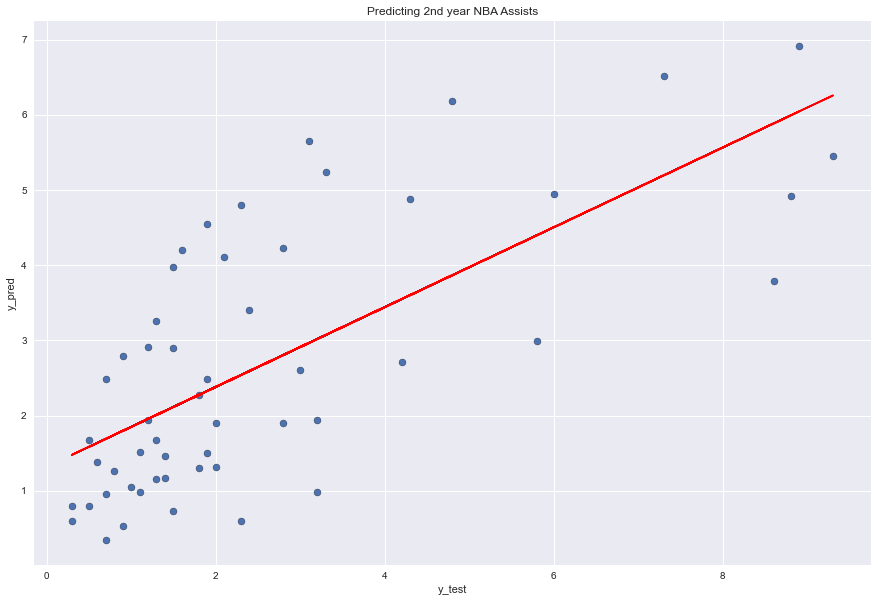

In [811]:
lr_model_ast = linear_reg(df[x_features], df['NBA_ast'], 'Assists')

In [812]:

lr_model_ast.predict(unseen_test[x_features])

array([ 3.77747187,  7.41483007,  3.86137237,  1.42609472,  3.30148463,
        4.09788468, -0.29625815,  1.0822534 ,  1.63189263,  1.63838649,
        2.66741216])

In [976]:
pred_ast = lr_model_ast.predict(unseen_test[x_features])

In [977]:
r2_score(unseen_test['NBA_ast'], pred_ast)

0.7597370910794881

In [978]:
series_ast = pd.Series(pred_ast).abs().round(2)

In [979]:



assists_df = pd.concat([unseen_test[['name', 'draft_pick', 'NBA_g', 'NBA_ast']], series_ast], axis=1 , ignore_index=True)

In [980]:
assists_df = assists_df.rename(columns={0: "name", 1: "draft_pick", 2: 'NBA_g', 3:"NBA_ast", 4:"pred_ast"})

In [981]:
assists_df

,name,draft_pick,NBA_g,NBA_ast,pred_ast
0,Zion Williamson,1,61,3.7,3.78
1,Ja Morant,2,58,7.3,7.41
2,RJ Barrett,3,66,3.0,3.86
3,De'Andre Hunter,4,20,2.1,1.43
4,Jarrett Culver,6,34,0.7,3.30
5,Coby White,7,63,4.7,4.10
6,Jaxson Hayes,8,54,0.5,0.30
7,Rui Hachimura,9,52,1.5,1.08
8,Cam Reddish,10,26,1.3,1.63
9,Cameron Johnson,11,60,1.4,1.64


## Blocks

In [822]:
feature_importance_nba_blk = summarise_feature_importance(df, x_features, 'NBA_blk')

In [823]:
feature_importance_nba_blk.style.apply(highlight_top5)

,corr,KBest Score,info_gain
NCAA_blk,0.745142,328.325851,0.480170
NCAA_trb,0.519064,96.991863,0.212715
NCAA_orb,0.516322,95.598286,0.302090
NCAA_3pa,0.490751,83.433851,0.129077
NCAA_3p,0.482450,79.786084,0.080975
NCAA_drb,0.478440,78.073155,0.208540
position_F-C,0.469512,74.370378,0.126902
NCAA_fgp,0.463206,71.844122,0.156291
position_G,0.452482,67.709507,0.197481
NCAA_ast,0.397479,49.347595,0.120502


Cross_val_scores_mse 0.13200449901861577
Cross_val_scores_r2 0.5944233653791795
Cross_val_scores_rmse 0.36332423400953556
adjusted r2  0.5763531192822122
R2:  0.5165259056117173
Mean squared error (MSE): 0.22
Root Mean Squared Error: 0.46508620046517124
Coefficient of determination (R^2): 0.52
Adjusted (R^2): 0.58


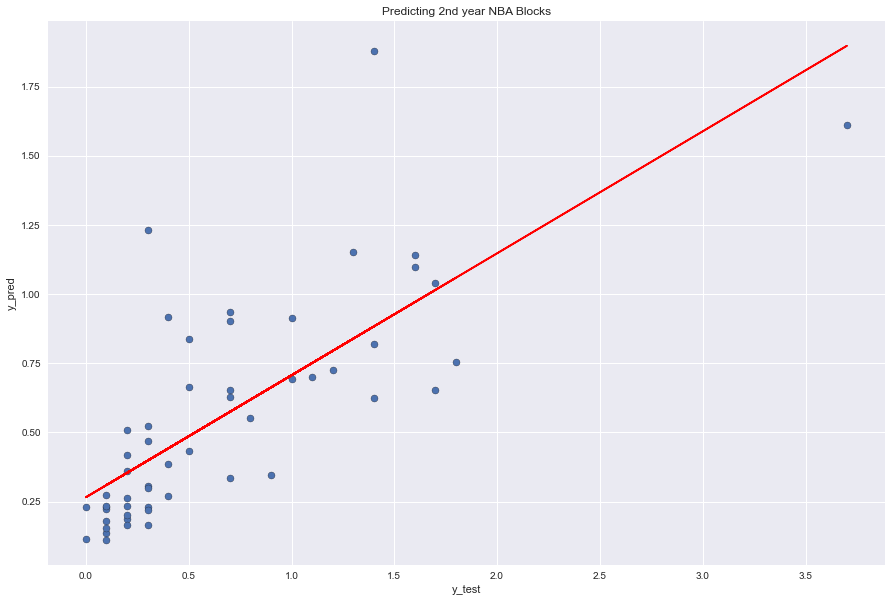

LinearRegression()

In [824]:
blks = ['NCAA_blk', 'NCAA_trb', 'NCAA_3pa', 'NCAA_fga', 'position_C', 'position_G', 'position_F', 'position_G-F', 'position_F-C']
linear_reg(df[blks], df['NBA_blk'], 'Blocks')

Coefficient of determination (R^2): 0.54
Mean squared error (MSE): 0.20
Root Mean Squared Error: 0.451634664929561
[7.43566434e-03 9.21750712e-03 1.71977932e-02 5.80892459e-03
 1.55688823e-02 1.48644144e-02 2.23554294e-02 5.77509642e-01
 3.45639417e-02 6.99112377e-03 8.94224547e-03 1.39020780e-02
 1.06483821e-02 1.35095501e-02 2.16931501e-02 5.73245572e-02
 1.24064866e-02 1.42726472e-02 7.18034177e-03 1.71456342e-02
 2.46515231e-02 1.75118164e-02 1.84846951e-02 3.44448887e-02
 2.47754801e-03 1.45549979e-03 9.21798150e-03 5.66727592e-04
 2.65092396e-03]


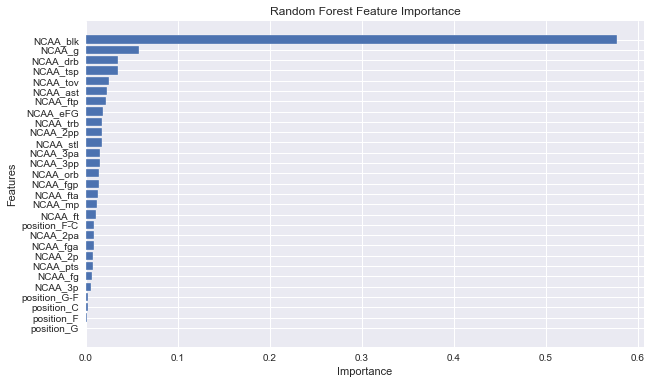

RandomForestRegressor(n_estimators=1000, random_state=23)

In [825]:
random_forest(df[x_features], df['NBA_blk'])

Coefficient of determination (R^2): 0.48
Mean squared error (MSE): 0.23
Root Mean Squared Error: 0.484324509608967
Cross_val_scores_mse 0.20956813417190778
Cross_val_scores_r2 0.6704649543459003
Cross_val_scores_rmse 0.457786122738455
adjusted r2  0.6179566228955217


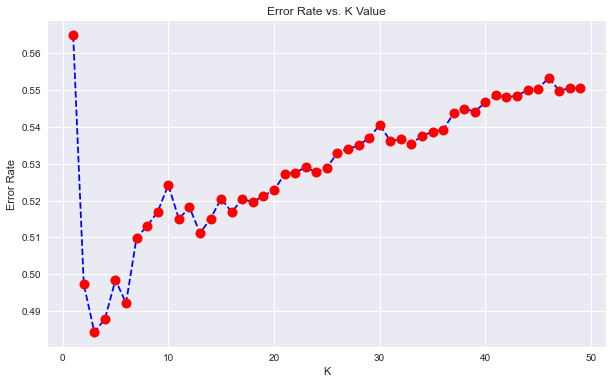

In [826]:
knn_model_blk = knn_model(df[x_features], df['NBA_blk'], 3)
# 3

Cross_val_scores_mse 0.14111075957415337
Cross_val_scores_r2 0.6129945923854458
Cross_val_scores_rmse 0.3756471210779518
adjusted r2  0.5746971822569222
R2:  0.5143044008395029
Mean squared error (MSE): 0.22
Root Mean Squared Error: 0.4661534831775811
Coefficient of determination (R^2): 0.51
Adjusted (R^2): 0.57


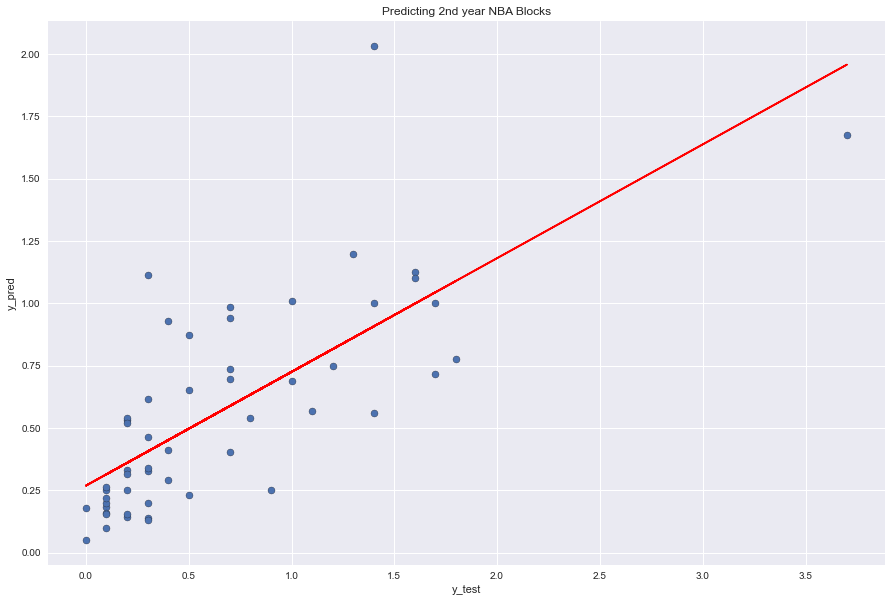

LinearRegression()

In [829]:
linear_reg(df[non_corr_x_features], df['NBA_blk'], 'Blocks')

Cross_val_scores_mse 0.14124300643576013
Cross_val_scores_r2 0.615314045395067
Cross_val_scores_rmse 0.37582310524468837
adjusted r2  0.5772461644706205
R2:  0.5327658029952975
Mean squared error (MSE): 0.21
Root Mean Squared Error: 0.45720835724079445
Coefficient of determination (R^2): 0.53
Adjusted (R^2): 0.58


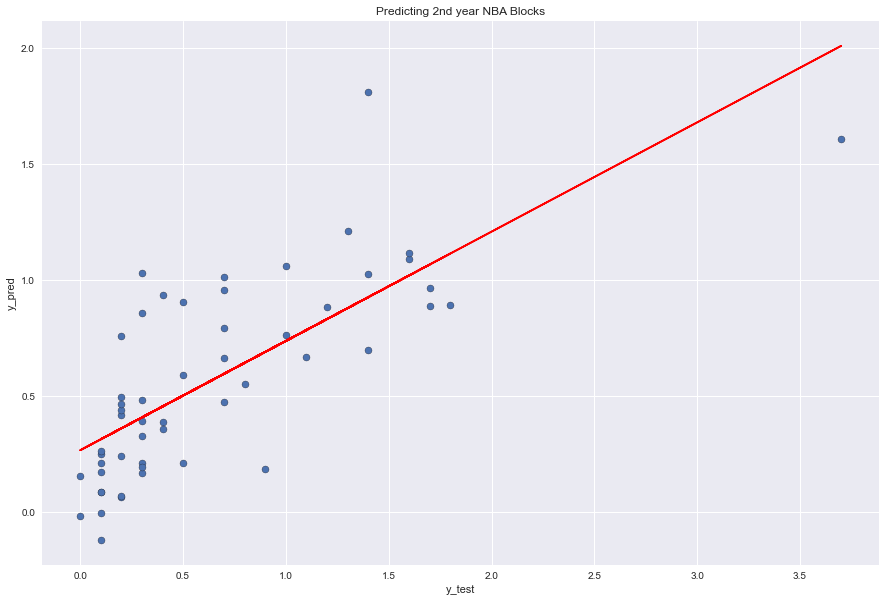

LinearRegression()

In [830]:
linear_reg(df_scaled[non_corr_x_features], df['NBA_blk'], 'Blocks')

Cross_val_scores_mse 0.13679303572466345
Cross_val_scores_r2 0.6453022200479197
Cross_val_scores_rmse 0.3698554254362959
adjusted r2  0.5887844419236872
R2:  0.5369951855731503
Mean squared error (MSE): 0.21
Root Mean Squared Error: 0.4551343385230476
Coefficient of determination (R^2): 0.54
Adjusted (R^2): 0.59


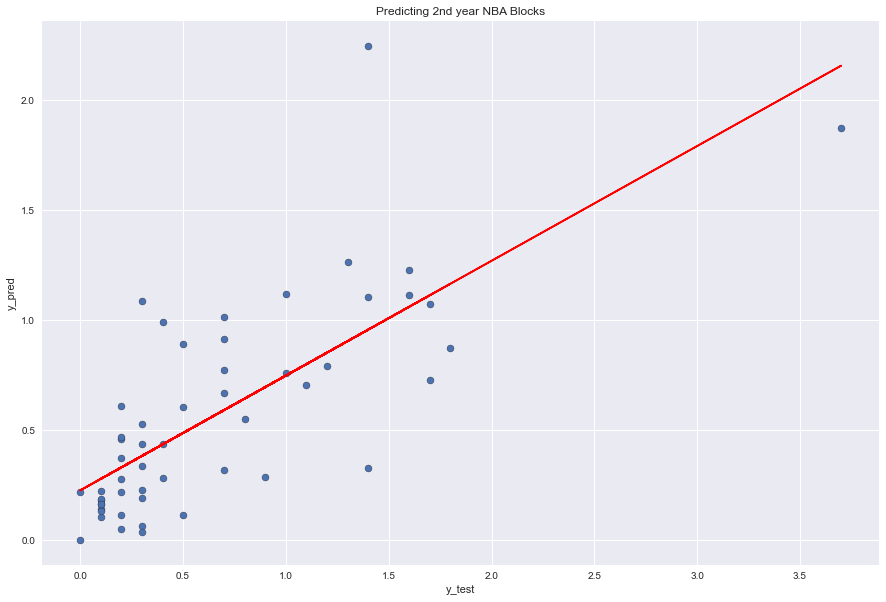

LinearRegression()

In [831]:
linear_reg(df[x_features], df['NBA_blk'], 'Blocks')

Cross_val_scores_mse 0.14215217354959278
Cross_val_scores_r2 0.6490668475474421
Cross_val_scores_rmse 0.37703073289798644
adjusted r2  0.5931489276511555
R2:  0.5703350568654522
Mean squared error (MSE): 0.19
Root Mean Squared Error: 0.43844165634857796
Coefficient of determination (R^2): 0.57
Adjusted (R^2): 0.59


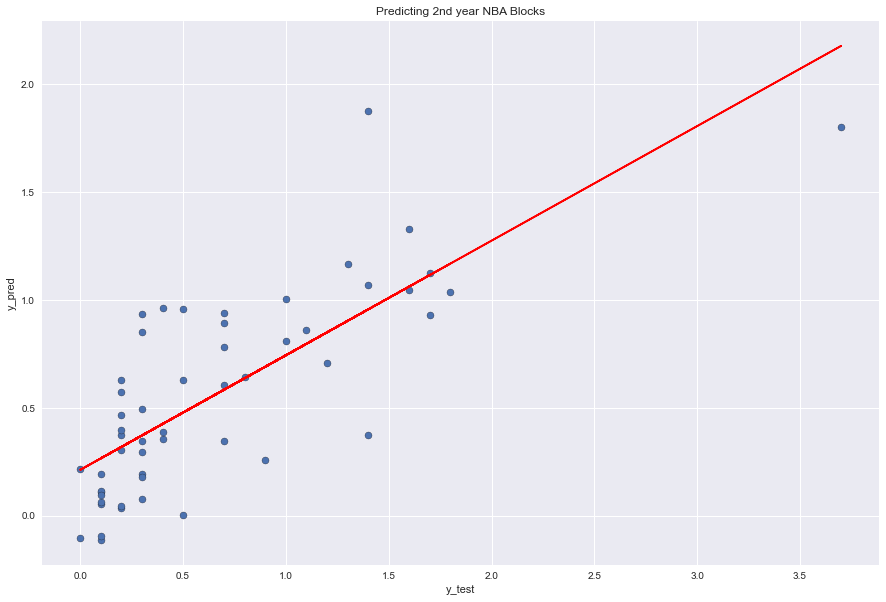

In [848]:
lr_model_blk = linear_reg(df_scaled[x_features], df['NBA_blk'], 'Blocks')

In [851]:
pred_blk = knn_model_blk.predict(unseen_test[x_features])

In [852]:
r2_score(unseen_test['NBA_blk'], pred_blk)

-11.902329749103941

In [841]:
series_blk = pd.Series(pred_blk).round(2)

In [842]:
blocks_df = pd.concat([unseen_test[['name', 'draft_pick', 'NBA_g', 'NBA_blk']], series_blk], axis=1 , ignore_index=True)

In [843]:
blocks_df = blocks_df.rename(columns={0: "name", 1: "draft_pick", 2: 'NBA_g', 3:"NBA_blk", 4:"pred_blk"})

In [844]:
blocks_df

,name,draft_pick,NBA_g,NBA_blk,pred_blk
0,Zion Williamson,1,61,0.6,0.60
1,Ja Morant,2,58,0.2,0.33
2,RJ Barrett,3,66,0.3,0.60
3,De'Andre Hunter,4,20,0.5,1.33
4,Jarrett Culver,6,34,0.3,1.07
5,Coby White,7,63,0.2,0.33
6,Jaxson Hayes,8,54,0.5,1.03
7,Rui Hachimura,9,52,0.1,1.20
8,Cam Reddish,10,26,0.3,0.33
9,Cameron Johnson,11,60,0.3,0.23


## Steals

In [580]:
feature_importance_nba_stl = summarise_feature_importance(df, x_features, 'NBA_stl')
feature_importance_nba_stl.style.apply(highlight_top5)

,corr,KBest Score,info_gain
NCAA_stl,0.649592,191.993599,0.381532
NCAA_ast,0.442724,64.116236,0.112652
position_G,0.330014,32.143847,0.036813
NCAA_fgp,0.317634,29.511855,0.056008
NCAA_3pa,0.293812,24.848698,0.127202
position_C,0.289169,23.998516,0.007464
NCAA_orb,0.271225,20.883372,0.104845
NCAA_3p,0.267024,20.192115,0.099226
NCAA_blk,0.257110,18.616404,0.095266
NCAA_trb,0.223216,13.791233,0.036440


Cross_val_scores_mse 0.10626477923648854
Cross_val_scores_r2 0.4556601824652118
Cross_val_scores_rmse 0.3259827897857317
adjusted r2  0.4314074183176222
R2:  0.15498678599037163
Mean squared error (MSE): 0.15
Root Mean Squared Error: 0.3881861770691146
Coefficient of determination (R^2): 0.15
Adjusted (R^2): 0.43


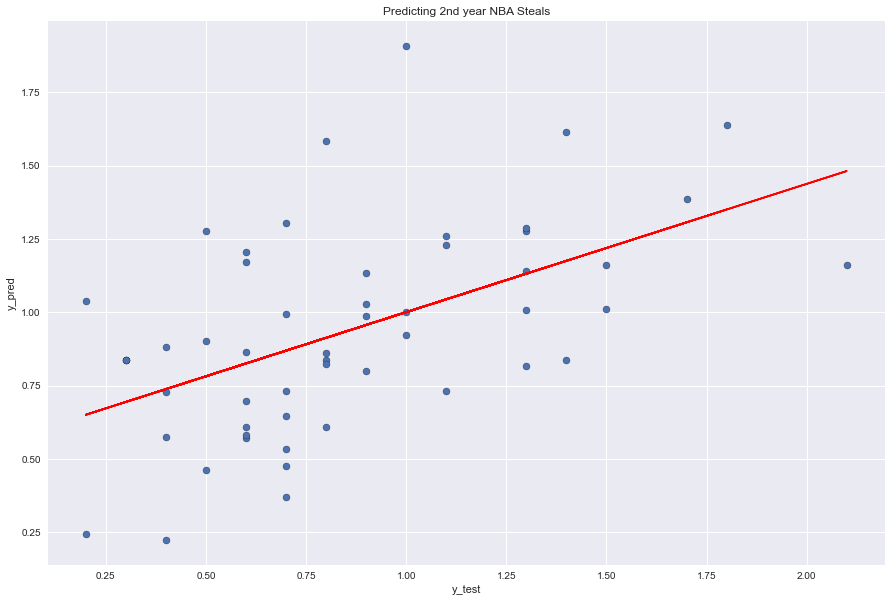

LinearRegression()

In [853]:
stl = ['NCAA_stl', 'NCAA_ast', 'NCAA_fgp', 'NCAA_3pa', 'position_C', 'position_G', 'position_F', 'position_G-F', 'position_F-C']
linear_reg(df[stl], df['NBA_stl'], 'Steals')

Coefficient of determination (R^2): 0.29
Mean squared error (MSE): 0.13
Root Mean Squared Error: 0.3550123099114719
[0.00897848 0.01084688 0.01275842 0.01321106 0.02995975 0.02700362
 0.06501724 0.01674851 0.0186635  0.01059209 0.0185885  0.01334091
 0.01734056 0.01957059 0.02223814 0.03457848 0.04085159 0.03250381
 0.01741211 0.45260882 0.02077187 0.02068616 0.02240351 0.02182585
 0.01393681 0.00295819 0.00147456 0.00152254 0.01160746]


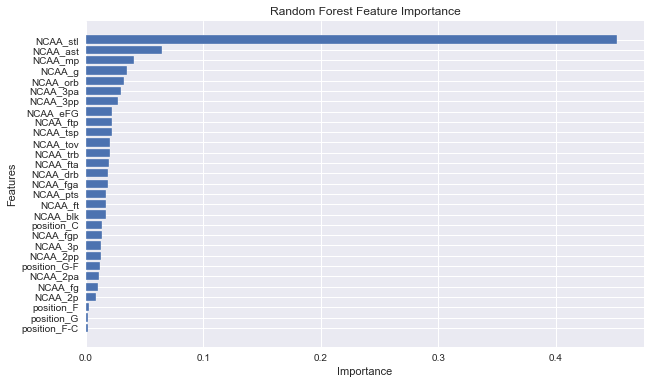

RandomForestRegressor(n_estimators=1000, random_state=23)

In [854]:
random_forest(df[x_features], df['NBA_stl'])

Coefficient of determination (R^2): -0.09
Mean squared error (MSE): 0.19
Root Mean Squared Error: 0.4415761744248738
Cross_val_scores_mse 0.16887631027253672
Cross_val_scores_r2 0.5623971809750159
Cross_val_scores_rmse 0.4109456293386471
adjusted r2  0.4926692592622437


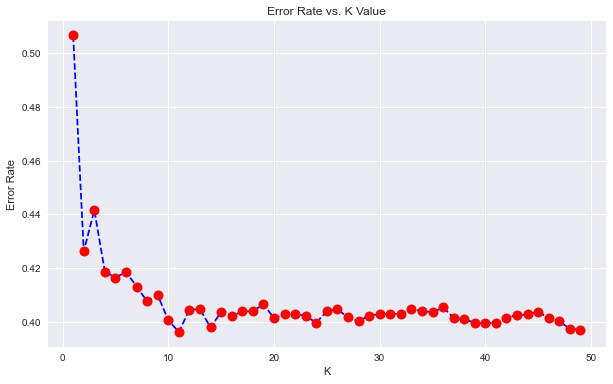

In [887]:
knn_model_stl = knn_model(df[x_features], df['NBA_stl'], 3)

Cross_val_scores_mse 0.10753981317596742
Cross_val_scores_r2 0.5136184887417365
Cross_val_scores_rmse 0.32793263511881127
adjusted r2  0.46548698502347097
R2:  0.197930243994609
Mean squared error (MSE): 0.14
Root Mean Squared Error: 0.37819378410187177
Coefficient of determination (R^2): 0.20
Adjusted (R^2): 0.47


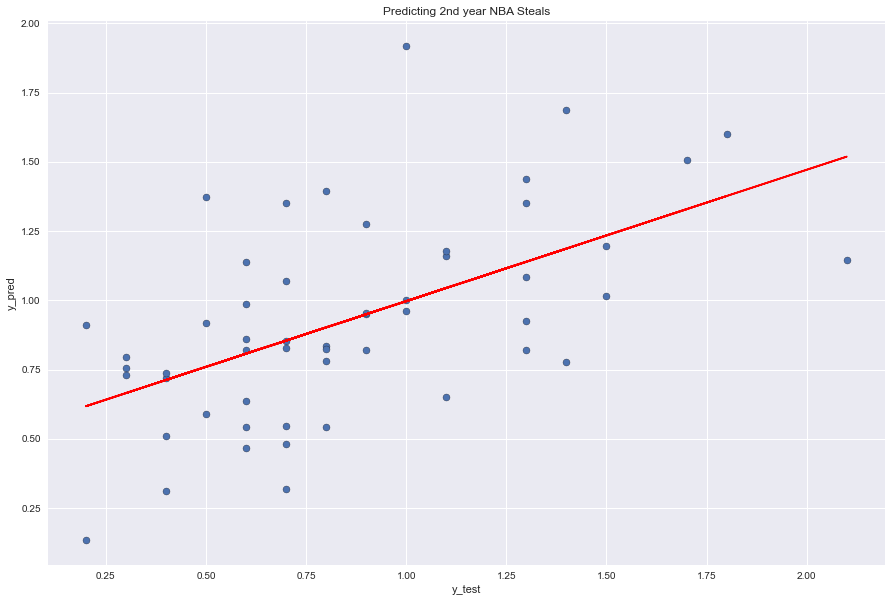

LinearRegression()

In [860]:
linear_reg(df[non_corr_x_features], df['NBA_stl'], 'Steals')

Cross_val_scores_mse 0.1088191373993332
Cross_val_scores_r2 0.5045555688786838
Cross_val_scores_rmse 0.32987745815580244
adjusted r2  0.45552721371563687
R2:  0.18806848753762095
Mean squared error (MSE): 0.14
Root Mean Squared Error: 0.3805117000443609
Coefficient of determination (R^2): 0.19
Adjusted (R^2): 0.46


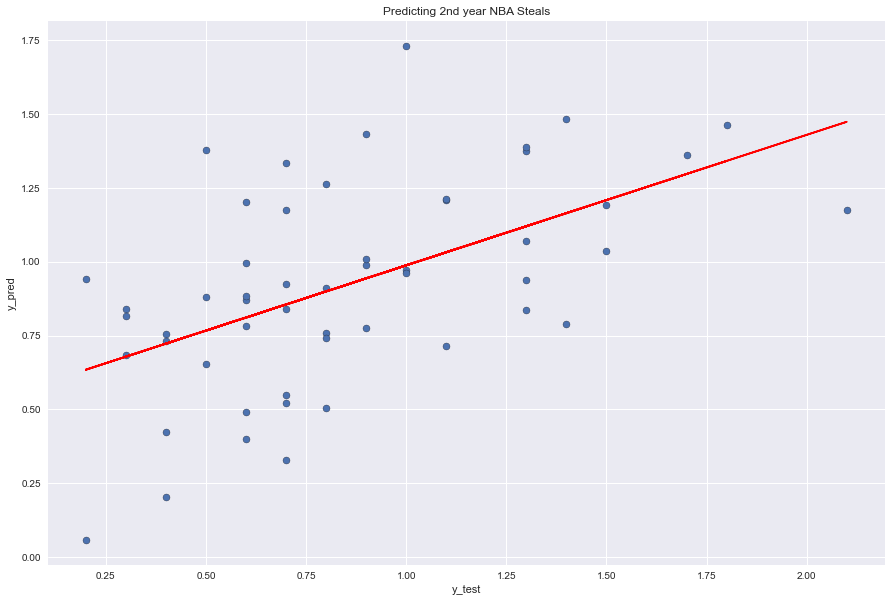

LinearRegression()

In [861]:
linear_reg(df_scaled[non_corr_x_features], df['NBA_stl'], 'Steals')

Cross_val_scores_mse 0.11052794927141849
Cross_val_scores_r2 0.5326031749032334
Cross_val_scores_rmse 0.33245743978954434
adjusted r2  0.4581278566185837
R2:  0.24106443774673003
Mean squared error (MSE): 0.14
Root Mean Squared Error: 0.36788388834278957
Coefficient of determination (R^2): 0.24
Adjusted (R^2): 0.46


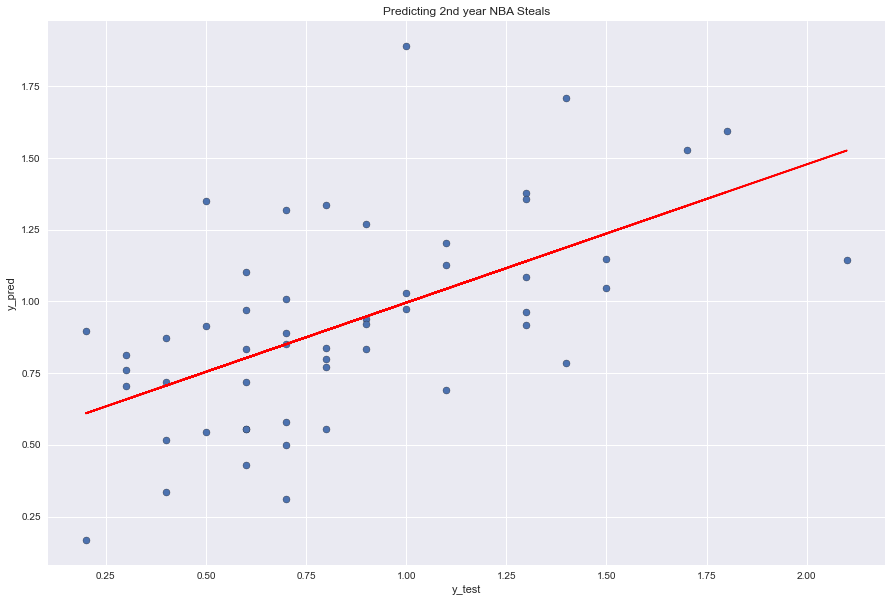

In [888]:
linear_reg(df[x_features], df['NBA_stl'], 'Steals')

Cross_val_scores_mse 0.11394091770000467
Cross_val_scores_r2 0.5515518738032938
Cross_val_scores_rmse 0.33755135564829936
adjusted r2  0.4800958536950274
R2:  0.2683040638182673
Mean squared error (MSE): 0.13
Root Mean Squared Error: 0.36122153835197535
Coefficient of determination (R^2): 0.27
Adjusted (R^2): 0.48


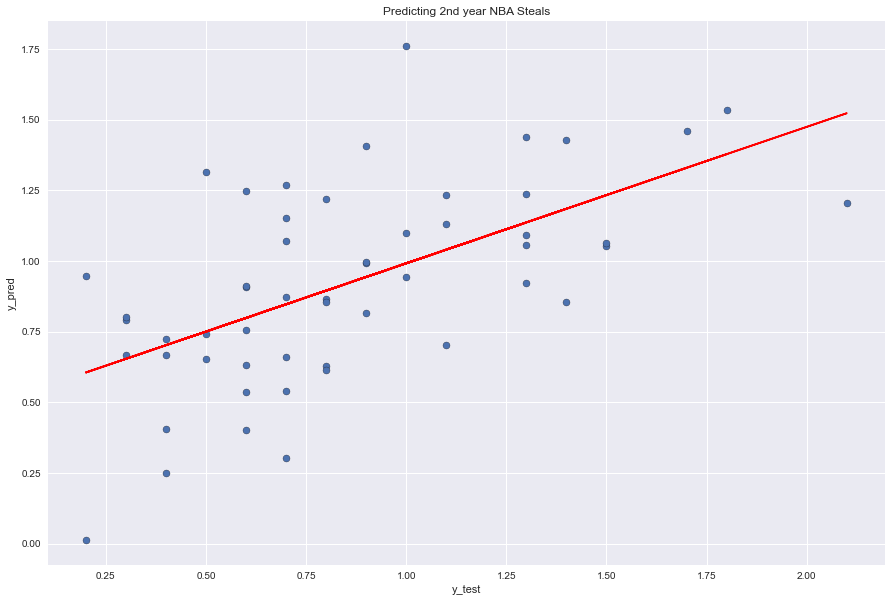

In [901]:
lr_model_stl = linear_reg(df_scaled[x_features], df['NBA_stl'], 'Steals')

In [908]:
pred_stl = lr_model_stl.predict(scaled_unseen_test[x_features])

In [910]:
r2_score(unseen_test['NBA_stl'], pred_stl)

-3.1454051866404322

In [904]:
series_stl = pd.Series(pred_stl).round(2)

In [905]:
steals_df = pd.concat([unseen_test[['name', 'draft_pick', 'NBA_g', 'NBA_stl']], series_stl], axis=1 , ignore_index=True)

In [906]:
steals_df = steals_df.rename(columns={0: "name", 1: "draft_pick", 2: 'NBA_g', 3:"NBA_stl", 4:"pred_stl"})

In [907]:
steals_df

,name,draft_pick,NBA_g,NBA_stl,pred_stl
0,Zion Williamson,1,61,0.9,1.55
1,Ja Morant,2,58,0.9,1.55
2,RJ Barrett,3,66,0.7,1.19
3,De'Andre Hunter,4,20,0.9,0.72
4,Jarrett Culver,6,34,0.5,1.29
5,Coby White,7,63,0.5,1.16
6,Jaxson Hayes,8,54,0.4,0.19
7,Rui Hachimura,9,52,0.8,0.67
8,Cam Reddish,10,26,1.3,0.88
9,Cameron Johnson,11,60,0.6,0.84


## Rebounds

In [911]:
feature_importance_nba_trb = summarise_feature_importance(df, x_features, 'NBA_trb')
feature_importance_nba_trb.style.apply(highlight_top5)

,corr,KBest Score,info_gain
NCAA_trb,0.627443,170.767831,0.277730
NCAA_orb,0.626120,169.584412,0.268793
NCAA_drb,0.577641,131.698719,0.273063
NCAA_3pa,0.476676,77.329932,0.204950
NCAA_blk,0.468049,73.777815,0.242366
NCAA_3p,0.465725,72.844653,0.132803
position_G,0.453381,68.048497,0.170623
NCAA_fgp,0.451004,67.155029,0.113494
position_F-C,0.406562,52.080427,0.142329
NCAA_2p,0.366748,40.872079,0.000000


Cross_val_scores_mse 3.5360721406698814
Cross_val_scores_r2 0.4525023845353183
Cross_val_scores_rmse 1.8804446656761484
adjusted r2  0.4309261238273506
R2:  0.34344721065592976
Mean squared error (MSE): 3.61
Root Mean Squared Error: 1.9002700643542487
Coefficient of determination (R^2): 0.34
Adjusted (R^2): 0.43


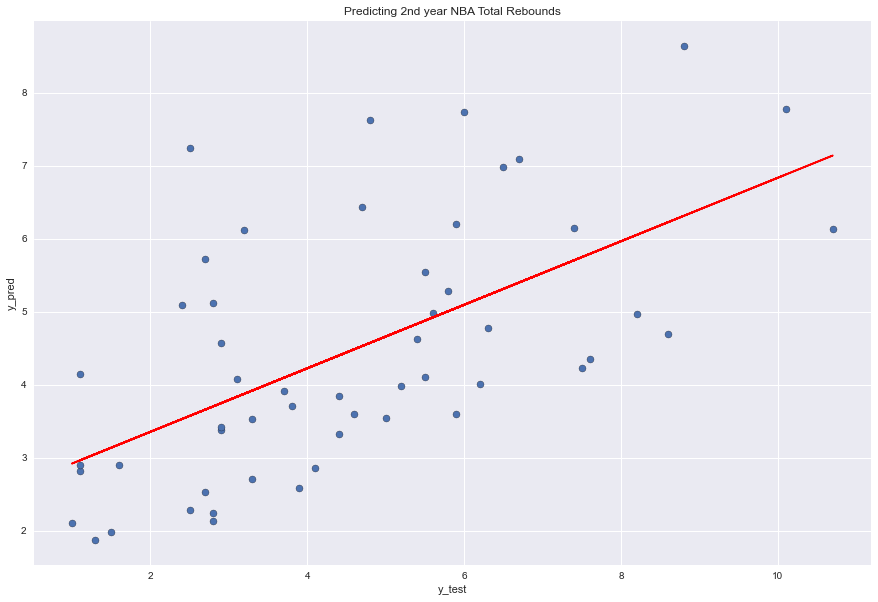

LinearRegression()

In [912]:
trb = ['NCAA_trb', 'NCAA_3pa', 'NCAA_blk', 'position_C', 'position_G', 'position_F', 'position_G-F', 'position_F-C']
linear_reg(df[trb], df['NBA_trb'], 'Total Rebounds')

Coefficient of determination (R^2): 0.44
Mean squared error (MSE): 3.10
Root Mean Squared Error: 1.7604009276941475
[0.00921173 0.01258759 0.01771186 0.00885473 0.01920906 0.02149899
 0.02088384 0.04512467 0.12433904 0.00852955 0.01536569 0.02081151
 0.02223256 0.02529604 0.04525321 0.0348259  0.02569184 0.14163838
 0.01136129 0.02015152 0.01809066 0.21439397 0.01911145 0.04857111
 0.00529904 0.00421082 0.0390772  0.00028045 0.00038628]


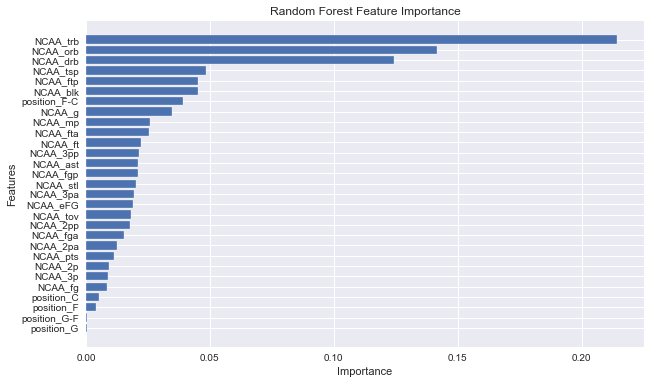

RandomForestRegressor(n_estimators=1000, random_state=23)

In [913]:
random_forest(df[x_features], df['NBA_trb'])

Coefficient of determination (R^2): 0.43
Mean squared error (MSE): 3.14
Root Mean Squared Error: 1.7711706351759948
Cross_val_scores_mse 3.862218888830816
Cross_val_scores_r2 0.43146253337057966
Cross_val_scores_rmse 1.9652528816492842
adjusted r2  0.34087139857797977


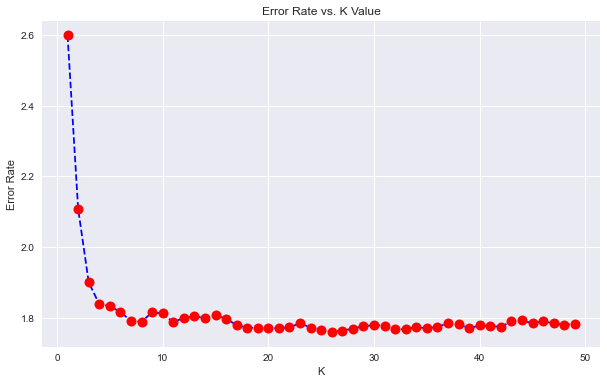

KNeighborsRegressor(n_neighbors=19)

In [914]:
knn_model(df[x_features], df['NBA_trb'], 19)

Cross_val_scores_mse 3.624543692355286
Cross_val_scores_r2 0.5161104936318155
Cross_val_scores_rmse 1.9038234404364514
adjusted r2  0.4682255945641306
R2:  0.40570519797785176
Mean squared error (MSE): 3.27
Root Mean Squared Error: 1.8079294004566715
Coefficient of determination (R^2): 0.41
Adjusted (R^2): 0.47


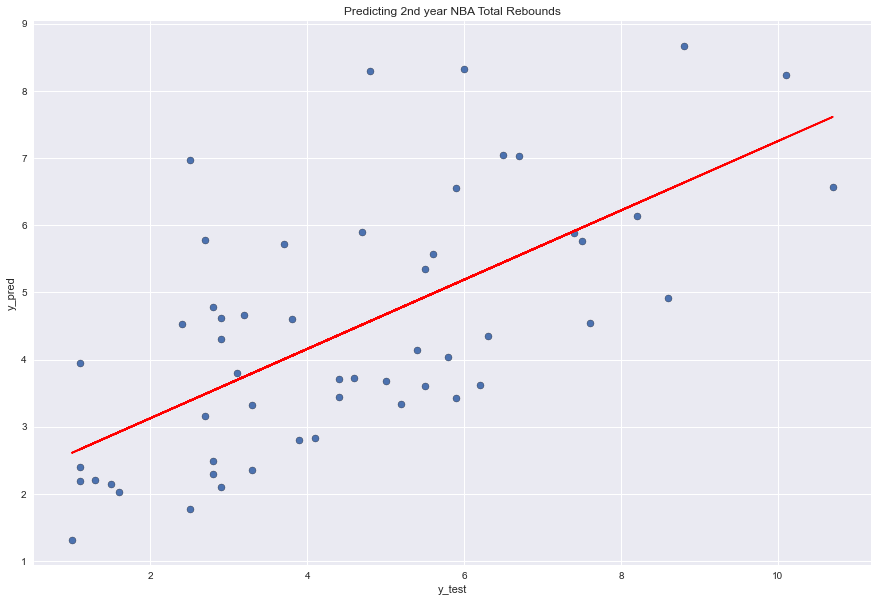

LinearRegression()

In [917]:
linear_reg(df[non_corr_x_features], df['NBA_trb'], 'Total Rebounds')

Cross_val_scores_mse 3.681104110704439
Cross_val_scores_r2 0.5274953131089027
Cross_val_scores_rmse 1.9186203664884929
adjusted r2  0.48073703680197133
R2:  0.43967899431274593
Mean squared error (MSE): 3.08
Root Mean Squared Error: 1.7554923989784428
Coefficient of determination (R^2): 0.44
Adjusted (R^2): 0.48


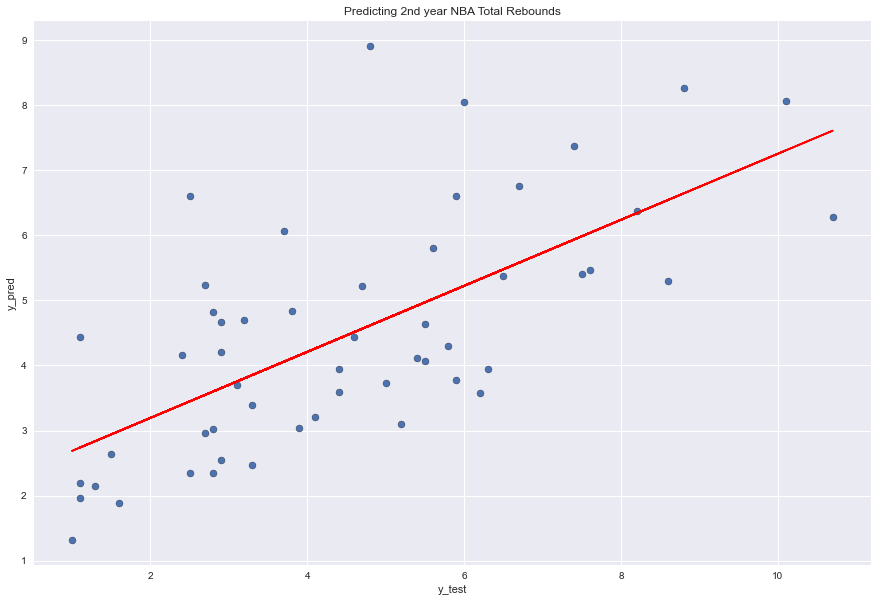

LinearRegression()

In [918]:
linear_reg(df_scaled[non_corr_x_features], df['NBA_trb'], 'Total Rebounds')

Cross_val_scores_mse 3.6947571695000945
Cross_val_scores_r2 0.547907371816992
Cross_val_scores_rmse 1.9221751141610628
adjusted r2  0.4758706343592599
R2:  0.34466993496916065
Mean squared error (MSE): 3.60
Root Mean Squared Error: 1.8984997655715992
Coefficient of determination (R^2): 0.34
Adjusted (R^2): 0.48


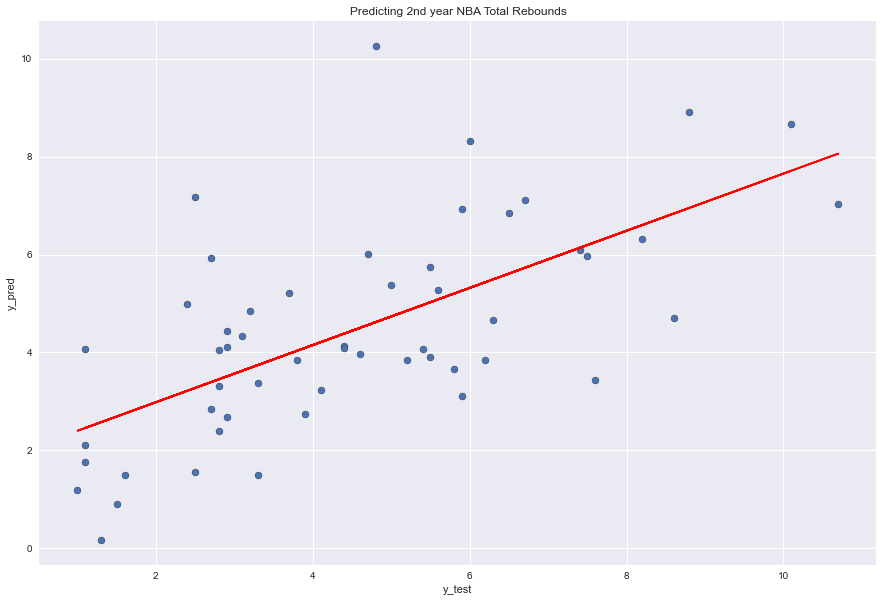

LinearRegression()

In [915]:
linear_reg(df[x_features], df['NBA_trb'], 'Total Rebounds')

Cross_val_scores_mse 3.702521074033683
Cross_val_scores_r2 0.5633139344810829
Cross_val_scores_rmse 1.9241936165660884
adjusted r2  0.4937320888764203
R2:  0.43196155734042374
Mean squared error (MSE): 3.12
Root Mean Squared Error: 1.7675404666867083
Coefficient of determination (R^2): 0.43
Adjusted (R^2): 0.49


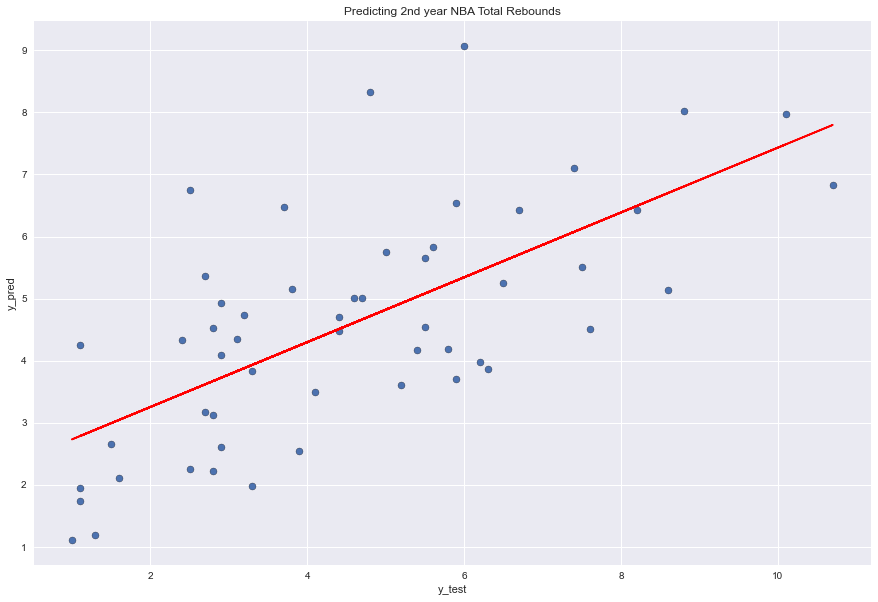

In [916]:
lr_scale_model_trb = linear_reg(df_scaled[x_features], df['NBA_trb'], 'Total Rebounds')

In [919]:
pred_trb = lr_scale_model_trb.predict(scaled_unseen_test[x_features])

In [920]:
series_trb = pd.Series(pred_trb).round(2)

In [921]:
rebounds_df = pd.concat([unseen_test[['name', 'draft_pick', 'NBA_g', 'NBA_trb']], series_trb], axis=1 , ignore_index=True)

In [922]:
rebounds_df = rebounds_df.rename(columns={0: "name", 1: "draft_pick", 2: 'NBA_g', 3:"NBA_trb", 4:"pred_trb"})

In [923]:
rebounds_df

,name,draft_pick,NBA_g,NBA_trb,pred_trb
0,Zion Williamson,1,61,7.2,8.61
1,Ja Morant,2,58,3.9,8.03
2,RJ Barrett,3,66,5.7,7.21
3,De'Andre Hunter,4,20,5.1,5.47
4,Jarrett Culver,6,34,3.1,5.24
5,Coby White,7,63,4.0,4.46
6,Jaxson Hayes,8,54,4.0,1.26
7,Rui Hachimura,9,52,5.5,4.58
8,Cam Reddish,10,26,4.0,2.50
9,Cameron Johnson,11,60,3.3,6.68


## Merge all together

In [982]:
results = pd.concat([points_df, assists_df[['NBA_ast', 'pred_ast']], blocks_df[['NBA_blk', 'pred_blk']], steals_df[['NBA_stl', 'pred_stl']], rebounds_df[['NBA_trb', 'pred_trb']]], axis=1)

In [983]:
results.round(2)

,name,draft_pick,NBA_g,NBA_pts,pred_pts,NBA_ast,pred_ast,NBA_blk,pred_blk,NBA_stl,pred_stl,NBA_trb,pred_trb
0,Zion Williamson,1,61,27.0,23.23,3.7,3.78,0.6,0.60,0.9,1.55,7.2,8.61
1,Ja Morant,2,58,19.4,21.60,7.3,7.41,0.2,0.33,0.9,1.55,3.9,8.03
2,RJ Barrett,3,66,17.6,20.16,3.0,3.86,0.3,0.60,0.7,1.19,5.7,7.21
3,De'Andre Hunter,4,20,16.0,12.45,2.1,1.43,0.5,1.33,0.9,0.72,5.1,5.47
4,Jarrett Culver,6,34,5.3,15.64,0.7,3.30,0.3,1.07,0.5,1.29,3.1,5.24
5,Coby White,7,63,14.9,16.93,4.7,4.10,0.2,0.33,0.5,1.16,4.0,4.46
6,Jaxson Hayes,8,54,6.6,4.81,0.5,0.30,0.5,1.03,0.4,0.19,4.0,1.26
7,Rui Hachimura,9,52,13.8,11.52,1.5,1.08,0.1,1.20,0.8,0.67,5.5,4.58
8,Cam Reddish,10,26,11.2,12.81,1.3,1.63,0.3,0.33,1.3,0.88,4.0,2.50
9,Cameron Johnson,11,60,9.6,13.04,1.4,1.64,0.3,0.23,0.6,0.84,3.3,6.68


In [984]:
def highlight_cols(x):
      
    # copy df to new - original data is not changed
    df = x.copy()
      
    # select all values to green color
    df.loc[:, :] = 'background-color: #d3d3d3'
    df[['name', 'draft_pick', 'NBA_g']] = 'background-color: none'
    # overwrite values grey color
    df[['pred_pts', 'pred_ast', 'pred_blk', 'pred_stl', 'pred_trb']] = 'background-color: #a9a9a9'
      
    # return color df
    return df.round(2)
  
print("Highlighted DataFrame :")
display(results.style.apply(highlight_cols, axis = None))

Highlighted DataFrame :


,name,draft_pick,NBA_g,NBA_pts,pred_pts,NBA_ast,pred_ast,NBA_blk,pred_blk,NBA_stl,pred_stl,NBA_trb,pred_trb
0,Zion Williamson,1,61,27.000000,23.230000,3.700000,3.780000,0.600000,0.600000,0.900000,1.550000,7.200000,8.610000
1,Ja Morant,2,58,19.400000,21.600000,7.300000,7.410000,0.200000,0.330000,0.900000,1.550000,3.900000,8.030000
2,RJ Barrett,3,66,17.600000,20.160000,3.000000,3.860000,0.300000,0.600000,0.700000,1.190000,5.700000,7.210000
3,De'Andre Hunter,4,20,16.000000,12.450000,2.100000,1.430000,0.500000,1.330000,0.900000,0.720000,5.100000,5.470000
4,Jarrett Culver,6,34,5.300000,15.640000,0.700000,3.300000,0.300000,1.070000,0.500000,1.290000,3.100000,5.240000
5,Coby White,7,63,14.900000,16.930000,4.700000,4.100000,0.200000,0.330000,0.500000,1.160000,4.000000,4.460000
6,Jaxson Hayes,8,54,6.600000,4.810000,0.500000,0.300000,0.500000,1.030000,0.400000,0.190000,4.000000,1.260000
7,Rui Hachimura,9,52,13.800000,11.520000,1.500000,1.080000,0.100000,1.200000,0.800000,0.670000,5.500000,4.580000
8,Cam Reddish,10,26,11.200000,12.810000,1.300000,1.630000,0.300000,0.330000,1.300000,0.880000,4.000000,2.500000
9,Cameron Johnson,11,60,9.600000,13.040000,1.400000,1.640000,0.300000,0.230000,0.600000,0.840000,3.300000,6.680000


In [985]:
pd.DataFrame(results)

,name,draft_pick,NBA_g,NBA_pts,pred_pts,NBA_ast,pred_ast,NBA_blk,pred_blk,NBA_stl,pred_stl,NBA_trb,pred_trb
0,Zion Williamson,1,61,27.0,23.23,3.7,3.78,0.6,0.60,0.9,1.55,7.2,8.61
1,Ja Morant,2,58,19.4,21.60,7.3,7.41,0.2,0.33,0.9,1.55,3.9,8.03
2,RJ Barrett,3,66,17.6,20.16,3.0,3.86,0.3,0.60,0.7,1.19,5.7,7.21
3,De'Andre Hunter,4,20,16.0,12.45,2.1,1.43,0.5,1.33,0.9,0.72,5.1,5.47
4,Jarrett Culver,6,34,5.3,15.64,0.7,3.30,0.3,1.07,0.5,1.29,3.1,5.24
5,Coby White,7,63,14.9,16.93,4.7,4.10,0.2,0.33,0.5,1.16,4.0,4.46
6,Jaxson Hayes,8,54,6.6,4.81,0.5,0.30,0.5,1.03,0.4,0.19,4.0,1.26
7,Rui Hachimura,9,52,13.8,11.52,1.5,1.08,0.1,1.20,0.8,0.67,5.5,4.58
8,Cam Reddish,10,26,11.2,12.81,1.3,1.63,0.3,0.33,1.3,0.88,4.0,2.50
9,Cameron Johnson,11,60,9.6,13.04,1.4,1.64,0.3,0.23,0.6,0.84,3.3,6.68
